# การท่องเที่ยวหลังโควิดฟื้นจริงหรือไม่ ? อุทยานแห่งชาติไหนที่มีศักยภาพดีสุด ?

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#B24C00">
Part 0. Import Python Library</h1>

- Select pandas, numpy, matplotlib, seaborn and sklearn to import.


In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'

# conda install -c anaconda seaborn
import seaborn as sns
sns.set()  # Plot using the seaborn style

import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.svm import SVC


print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )
print( f"Sklearn {sk.__version__}" )

Python 3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.1
NumPy 1.21.1
Matplotlib 3.4.1
Seaborn 0.11.1
Sklearn 0.24.2


<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#B24C00">
Part I. จริงหรือไม่ที่จำนวนนักท่องเที่ยวไทยและนักท่องเที่ยวต่างชาติในอุทยานแห่งชาติมีแนวโน้มเพิ่มขึ้นเรื่อย ๆในทุกๆปี (ปี 2016-2022) ?</h1>

- Load traveler data.
- Check null value, Drop column no. and Change type of name to category.
- Calculate total traveler per year.
- Calculate average traveler per year and adjust format before creating bar chart.
- Plot bar chart with trend.
- Plot bar chart without trend



**หมายเหตุ ข้อนี้เป็นคำถามพื้นฐานเริ่มต้น เพื่อวิเคราะห์ปัญหาโควิดว่ามีผลกระทบกับจำนวนนักท่องเที่ยวอุทยานแห่งชาติมากน้อยแค่ไหน และสถานการณ์ปัจจุบันหลังยุคโควิดที่ได้มีการเปิดประเทศแล้วจำนวนนักท่องเที่ยวอุทยานแห่งชาติกลับมาเป็นปกติเหมือนก่อนยุคโควิดแล้วหรือไม่ `โดยเทียบเป็นช่วงเวลาก่อนโควิด, ช่วงเวลาระหว่างโควิด และช่วงเวลาหลังโควิด`**

In [2]:
# Load the traveler data
df_trv2016 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Traveller2016.xlsx')  
df_trv2017 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Traveller2017.xlsx')
df_trv2018 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Traveller2018.xlsx') 
df_trv2019 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Traveller2019.xlsx') 
df_trv2020 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Traveller2020.xlsx') 
df_trv2021 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Traveller2021.xlsx') 
df_trv2022 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Traveller2022.xlsx') 

In [3]:
# Check null value, Drop column no. and Change type of name to category.
df_trv2016.isnull().sum()
df_trv2016.Name = df_trv2016.Name.astype('category')
df_trv2016 = df_trv2016.drop(columns=['No'])
df_trv2016.info()

df_trv2017.isnull().sum()
df_trv2017.Name = df_trv2017.Name.astype('category')
df_trv2017 = df_trv2017.drop(columns=['No'])
df_trv2017.info()

df_trv2018.isnull().sum()
df_trv2018.Name = df_trv2018.Name.astype('category')
df_trv2018 = df_trv2018.drop(columns=['No'])
df_trv2018.info()

df_trv2019.isnull().sum()
df_trv2019.Name = df_trv2019.Name.astype('category')
df_trv2019 = df_trv2019.drop(columns=['No'])
df_trv2019.info()

df_trv2020.isnull().sum()
df_trv2020.Name = df_trv2020.Name.astype('category')
df_trv2020 = df_trv2020.drop(columns=['No'])
df_trv2020.info()

df_trv2021.isnull().sum()
df_trv2021.Name = df_trv2021.Name.astype('category')
df_trv2021 = df_trv2021.drop(columns=['No'])
df_trv2021.info()

df_trv2022.isnull().sum()
df_trv2022.Name = df_trv2022.Name.astype('category')
df_trv2022 = df_trv2022.drop(columns=['No'])
df_trv2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      147 non-null    category
 1   Oct 2015  147 non-null    int64   
 2   Nov 2015  147 non-null    int64   
 3   Dec 2015  147 non-null    int64   
 4   Jan 2016  147 non-null    int64   
 5   Feb 2016  147 non-null    int64   
 6   Mar 2016  147 non-null    int64   
 7   Apr 2016  147 non-null    int64   
 8   May 2016  147 non-null    int64   
 9   Jun 2016  147 non-null    int64   
 10  Jul 2016  147 non-null    int64   
 11  Aug 2016  147 non-null    int64   
 12  Sep 2016  147 non-null    int64   
 13  Total     147 non-null    int64   
dtypes: category(1), int64(13)
memory usage: 20.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      15

In [4]:
# Calculate total traveler per year.
y1 = df_trv2016['Total'].sum()
fmt_y1 = "{:,d}".format(y1)
y2 = df_trv2017['Total'].sum()
fmt_y2 = "{:,d}".format(y2)
y3 = df_trv2018['Total'].sum()
fmt_y3 = "{:,d}".format(y3)
y4 = df_trv2019['Total'].sum()
fmt_y4 = "{:,d}".format(y4)
y5 = df_trv2020['Total'].sum()
fmt_y5 = "{:,d}".format(y5)
y6 = df_trv2021['Total'].sum()
fmt_y6 = "{:,d}".format(y6)
y7 = df_trv2022['Total'].sum()
fmt_y7 = "{:,d}".format(y7)
print ("Total Traveler Per Year")
print( f"Y2016 : {fmt_y1}\nY2017 : {fmt_y2}\nY2018 : {fmt_y3}\nY2019 : {fmt_y4}\nY2020 : {fmt_y5}\nY2021 : {fmt_y6}\nY2022 : {fmt_y7}" ) 

Total Traveler Per Year
Y2016 : 16,688,999
Y2017 : 18,786,534
Y2018 : 19,640,382
Y2019 : 20,594,744
Y2020 : 13,994,679
Y2021 : 7,478,565
Y2022 : 11,485,867


In [5]:
# Calculate average traveler per year and adjust format before creating bar chart. 
x = []
for i in range(1,8):
    t = 2015+i
    x.append(t)

ydata = []
y1 = df_trv2016['Total'].mean()
ydata.append(y1)
format_y1 = "{:.2f}".format(y1)

y2 = df_trv2017['Total'].mean()
ydata.append(y2)
format_y2 = "{:.2f}".format(y2)

y3 = df_trv2018['Total'].mean()
ydata.append(y3)
format_y3 = "{:.2f}".format(y3)

y4 = df_trv2019['Total'].mean()
ydata.append(y4)
format_y4 = "{:.2f}".format(y4)

y5 = df_trv2020['Total'].mean()
ydata.append(y5)
format_y5 = "{:.2f}".format(y5)

y6 = df_trv2021['Total'].mean()
ydata.append(y6)
format_y6 = "{:.2f}".format(y6)

y7 = df_trv2022['Total'].mean()
ydata.append(y7)
format_y7 = "{:.2f}".format(y7)

print("Average Traveler Per Year")
print(f"Y2016 : {format_y1}\nY2017 : {format_y2}\nY2018 : {format_y3}\nY2019 : {format_y4}\nY2020 : {format_y5}\nY2021 : {format_y6}\nY2022 : {format_y7}" )
print(x)
print(ydata)    

Average Traveler Per Year
Y2016 : 113530.61
Y2017 : 121990.48
Y2018 : 127534.95
Y2019 : 132869.32
Y2020 : 90288.25
Y2021 : 48248.81
Y2022 : 74102.37
[2016, 2017, 2018, 2019, 2020, 2021, 2022]
[113530.60544217686, 121990.48051948052, 127534.94805194806, 132869.31612903226, 90288.25161290323, 48248.8064516129, 74102.36774193548]


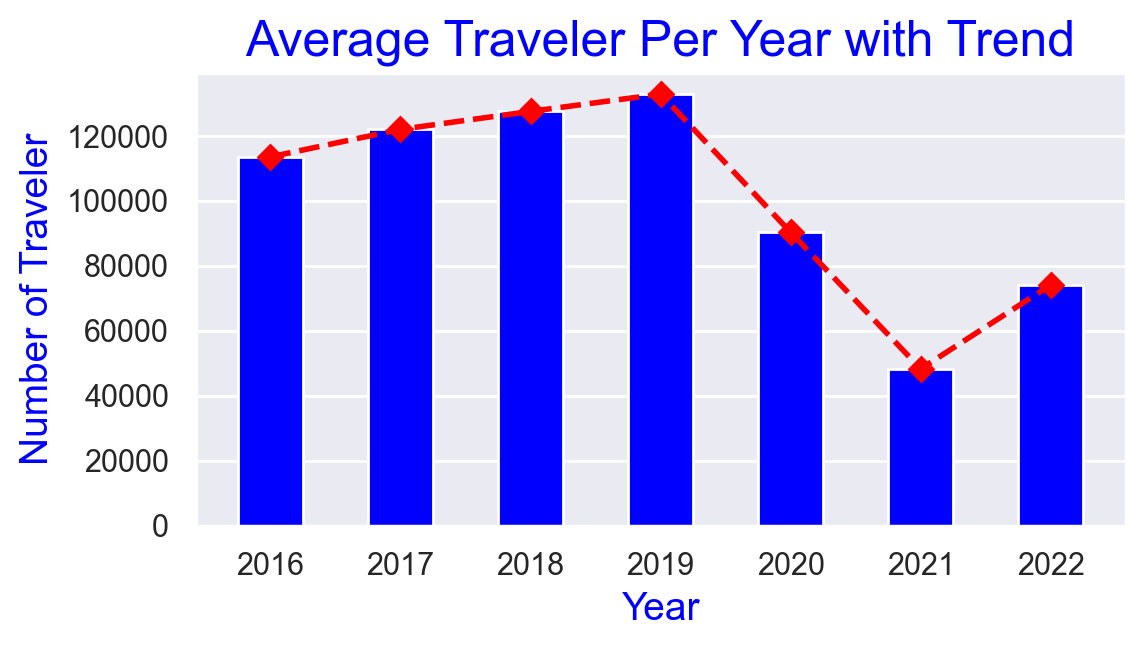

In [6]:
# Plot bar chart with trend.
plt.figure(figsize=[6,3], dpi=100)
plt.bar(x,ydata,color='blue',width=0.5,align='center')
plt.savefig('AverageTravelerPerYearWithTrend.png', dpi=1000, transparent=False)
plt.title('Average Traveler Per Year with Trend',fontsize=18, color='blue')
plt.xlabel('Year',fontsize=14, color='blue')
plt.ylabel('Number of Traveler',fontsize=14, color='blue')
plt.grid(linestyle='--',axis='x')
lines = plt.plot(x,ydata)
plt.setp(lines, color='red', linewidth=2.0, linestyle='--', marker='D')
plt.show()

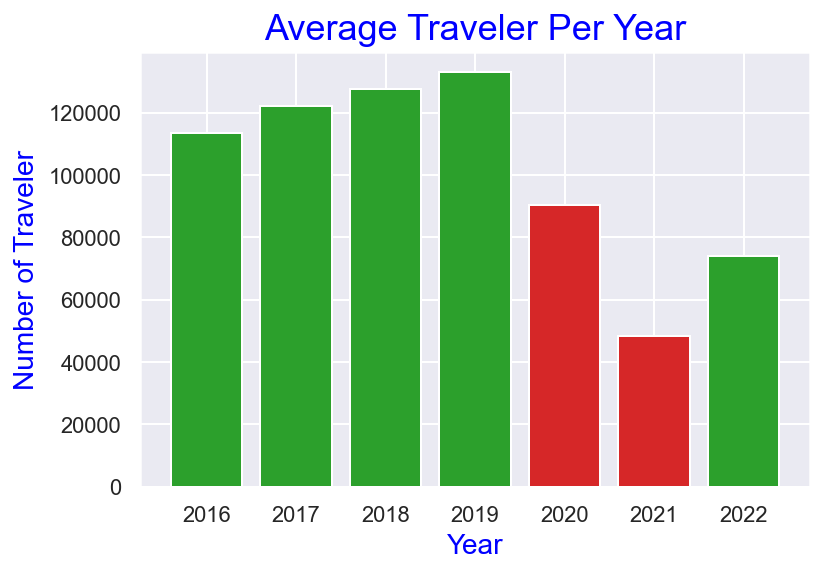

<Figure size 30000x20000 with 0 Axes>

In [7]:
# Plot bar chart without trend.
fig, ax = plt.subplots()

plt.figure(figsize=[30,20], dpi=1000)
bar_labels = x
bar_colors = ['tab:green','tab:green','tab:green','tab:green','tab:red','tab:red','tab:green']

ax.bar(x, ydata, label=bar_labels, color=bar_colors)

ax.set_xlabel('Year',fontsize=14, color='blue')
ax.set_ylabel('Number of Traveler',fontsize=14, color='blue')
ax.set_title('Average Traveler Per Year',fontsize=18, color='blue')

plt.savefig('AverageTravelerPerYear.png', dpi=500, transparent=False)
plt.show()

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#228B22">
Answer for Part I. จากรูปจะพบว่า ช่วงก่อนโควิด ปี2016-2019 จำนวนนักท่องเที่ยวจะเพิ่มขึ้นเรื่อย ๆในทุกๆปี แต่ช่วงวิกฤติโควิด19 ปี2020-2021 จำนวนนักท่องเที่ยวลดลงเป็นอย่างมาก และเพิ่งมาฟื้นตัวได้ในปี 2022 เท่านั้น </h1>

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#B24C00">
 
นอกจากนี้แล้ว ลองเอาข้อมูลจำนวนในอุทยานแห่งชาติในทุกๆเดือน ตั้งแต่ปี2016-2022 มาพล๊อทดู Trend ของจำนวนนักท่องเที่ยวในแต่ล่ะเดือนว่าเป็น Seasonal หรือไม่ ?</h1>

- Drop total traveler column.
- Combine all traveler data into total traveler file.
- Check null value.
- Replace null value to zero because no traveler visited in the natural park.
- Recheck total traveler data.
- Create array for counting the column.
- Create array for collecting the first row of data. (Kao-yai Natural Park)
- Plot bar chart with trend.

In [8]:
# Drop total traveler column. 
df_trv2016 = df_trv2016.drop(columns=['Total'])
df_trv2017 = df_trv2017.drop(columns=['Total'])
df_trv2018 = df_trv2018.drop(columns=['Total'])
df_trv2019 = df_trv2019.drop(columns=['Total'])
df_trv2020 = df_trv2020.drop(columns=['Total'])
df_trv2021 = df_trv2021.drop(columns=['Total'])
df_trv2022 = df_trv2022.drop(columns=['Total'])

In [9]:
# Combine all traveler data into total traveler file.
df_tot_trv = pd.merge( df_trv2016, df_trv2017, left_on='Name', right_on='Name', how='outer' )
df_tot_trv = df_tot_trv.reset_index(drop=True)
df_tot_trv = pd.merge( df_tot_trv, df_trv2018, left_on='Name', right_on='Name', how='outer' )
df_tot_trv = df_tot_trv.reset_index(drop=True)
df_tot_trv = pd.merge( df_tot_trv, df_trv2019, left_on='Name', right_on='Name', how='outer' )
df_tot_trv = df_tot_trv.reset_index(drop=True)
df_tot_trv = pd.merge( df_tot_trv, df_trv2020, left_on='Name', right_on='Name', how='outer' )
df_tot_trv = df_tot_trv.reset_index(drop=True)
df_tot_trv = pd.merge( df_tot_trv, df_trv2021, left_on='Name', right_on='Name', how='outer' )
df_tot_trv = df_tot_trv.reset_index(drop=True)
df_tot_trv = pd.merge( df_tot_trv, df_trv2022, left_on='Name', right_on='Name', how='outer' )
df_tot_trv = df_tot_trv.reset_index(drop=True)

df_tot_trv.info()
df_tot_trv.to_excel('total_trv.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 85 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      156 non-null    object 
 1   Oct 2015  147 non-null    float64
 2   Nov 2015  147 non-null    float64
 3   Dec 2015  147 non-null    float64
 4   Jan 2016  147 non-null    float64
 5   Feb 2016  147 non-null    float64
 6   Mar 2016  147 non-null    float64
 7   Apr 2016  147 non-null    float64
 8   May 2016  147 non-null    float64
 9   Jun 2016  147 non-null    float64
 10  Jul 2016  147 non-null    float64
 11  Aug 2016  147 non-null    float64
 12  Sep 2016  147 non-null    float64
 13  Oct 2016  154 non-null    float64
 14  Nov 2016  154 non-null    float64
 15  Dec 2016  154 non-null    float64
 16  Jan 2017  154 non-null    float64
 17  Feb 2017  154 non-null    float64
 18  Mar 2017  154 non-null    float64
 19  Apr 2017  154 non-null    float64
 20  May 2017  154 non-null    float6

In [10]:
# Check null value.
df_tot_trv.isnull().sum()

Name        0
Oct 2015    9
Nov 2015    9
Dec 2015    9
Jan 2016    9
           ..
May 2022    1
Jun 2022    1
Jul 2022    1
Aug 2022    1
Sep 2022    1
Length: 85, dtype: int64

In [11]:
# Replace null value to zero because no travller visited in the natural park.
colm = ['Oct 2015','Nov 2015','Dec 2015','Jan 2016','Feb 2016','Mar 2016','Apr 2016','May 2016','Jun 2016','Jul 2016','Aug 2016','Sep 2016'
       ,'Oct 2016','Nov 2016','Dec 2016','Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','Jun 2017','Jul 2017','Aug 2017','Sep 2017'
       ,'Oct 2017','Nov 2017','Dec 2017','Jan 2018','Feb 2018','Mar 2018','Apr 2018','May 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018'
       ,'Oct 2018','Nov 2018','Dec 2018','Jan 2019','Feb 2019','Mar 2019','Apr 2019','May 2019','Jun 2019','Jul 2019','Aug 2019','Sep 2019'
       ,'Oct 2019','Nov 2019','Dec 2019','Jan 2020','Feb 2020','Mar 2020','Apr 2020','May 2020','Jun 2020','Jul 2020','Aug 2020','Sep 2020'
       ,'Oct 2020','Nov 2020','Dec 2020','Jan 2021','Feb 2021','Mar 2021','Apr 2021','May 2021','Jun 2021','Jul 2021','Aug 2021','Sep 2021'
       ,'Oct 2021','Nov 2021','Dec 2021','Jan 2022','Feb 2022','Mar 2022','Apr 2022','May 2022','Jun 2022','Jul 2022','Aug 2022','Sep 2022'
       ]
df_tot_trv[colm] = df_tot_trv[colm].fillna(0)
df_tot_trv.isnull().sum()

Name        0
Oct 2015    0
Nov 2015    0
Dec 2015    0
Jan 2016    0
           ..
May 2022    0
Jun 2022    0
Jul 2022    0
Aug 2022    0
Sep 2022    0
Length: 85, dtype: int64

In [12]:
# Recheck total traveler data.
df_tot_trv

,Name,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,...,Dec 2021,Jan 2022,Feb 2022,Mar 2022,Apr 2022,May 2022,Jun 2022,Jul 2022,Aug 2022,Sep 2022
0,เขาใหญ่,130757.0,113175.0,207246.0,156437.0,114294.0,57422.0,69303.0,64072.0,55369.0,...,250501.0,158936.0,79772.0,65480.0,98123.0,96790.0,85674.0,133876.0,84645.0,61213.0
1,ทับลาน,1866.0,893.0,1931.0,1897.0,1061.0,1350.0,7170.0,1264.0,901.0,...,33159.0,21317.0,14329.0,5084.0,5159.0,4695.0,4698.0,9071.0,6582.0,4865.0
2,ปางสีดา,21160.0,9184.0,6283.0,5060.0,1456.0,597.0,1331.0,1332.0,6750.0,...,4599.0,4472.0,1356.0,1313.0,2632.0,1795.0,2115.0,5622.0,5177.0,2462.0
3,ตาพระยา,15.0,13.0,300.0,280.0,141.0,130.0,7.0,12.0,9.0,...,629.0,332.0,265.0,193.0,176.0,107.0,79.0,229.0,189.0,123.0
4,น้ำตกสามหลั่น,6727.0,2108.0,2838.0,2326.0,1073.0,1422.0,1404.0,1572.0,1319.0,...,6787.0,4420.0,1384.0,2735.0,4106.0,0.0,0.0,5065.0,5280.0,5583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,ภูชี้ฟ้า,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56038.0,29211.0,3945.0,1094.0,1109.0,967.0,887.0,0.0,0.0,1453.0
152,น้ำตกบัวตอง-น้ำพุเจ็ดสี,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6982.0,6966.0,4593.0,10935.0,25568.0,10939.0,8387.0,14396.0,11916.0,9198.0
153,แม่สะเรียง,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,69.0,32.0,17.0,14.0,12.0,12.0,28.0,12.0,3.0
154,แม่ยวมฝั่งซ้าย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Create array for counting the column.
x = []
for i in range(1,85):
#    t = df_tot_trv.columns[i]
     x.append(i)
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


In [14]:
# Create array for collecting the first row of data. (Kao-yai Natural Park)
ydata = []
for i in range(1,85):
    d = df_tot_trv.iloc[0,i]
    ydata.append(d)
print(ydata)

[130757.0, 113175.0, 207246.0, 156437.0, 114294.0, 57422.0, 69303.0, 64072.0, 55369.0, 120310.0, 116129.0, 71859.0, 131847.0, 123459.0, 318392.0, 225156.0, 112769.0, 70957.0, 96398.0, 70375.0, 61626.0, 125203.0, 111160.0, 86062.0, 158948.0, 143019.0, 290360.0, 174128.0, 95383.0, 73138.0, 96289.0, 86434.0, 77806.0, 120644.0, 95145.0, 78582.0, 184311.0, 142599.0, 294233.0, 161324.0, 103188.0, 72457.0, 97145.0, 95113.0, 88876.0, 122174.0, 106731.0, 83298.0, 202997.0, 188737.0, 328758.0, 147071.0, 102413.0, 49076.0, 0.0, 0.0, 0.0, 181446.0, 117248.0, 130178.0, 69292.0, 206853.0, 233666.0, 103919.0, 81230.0, 57042.0, 62164.0, 45275.0, 71266.0, 36938.0, 64033.0, 115734.0, 157662.0, 156093.0, 250501.0, 158936.0, 79772.0, 65480.0, 98123.0, 96790.0, 85674.0, 133876.0, 84645.0, 61213.0]


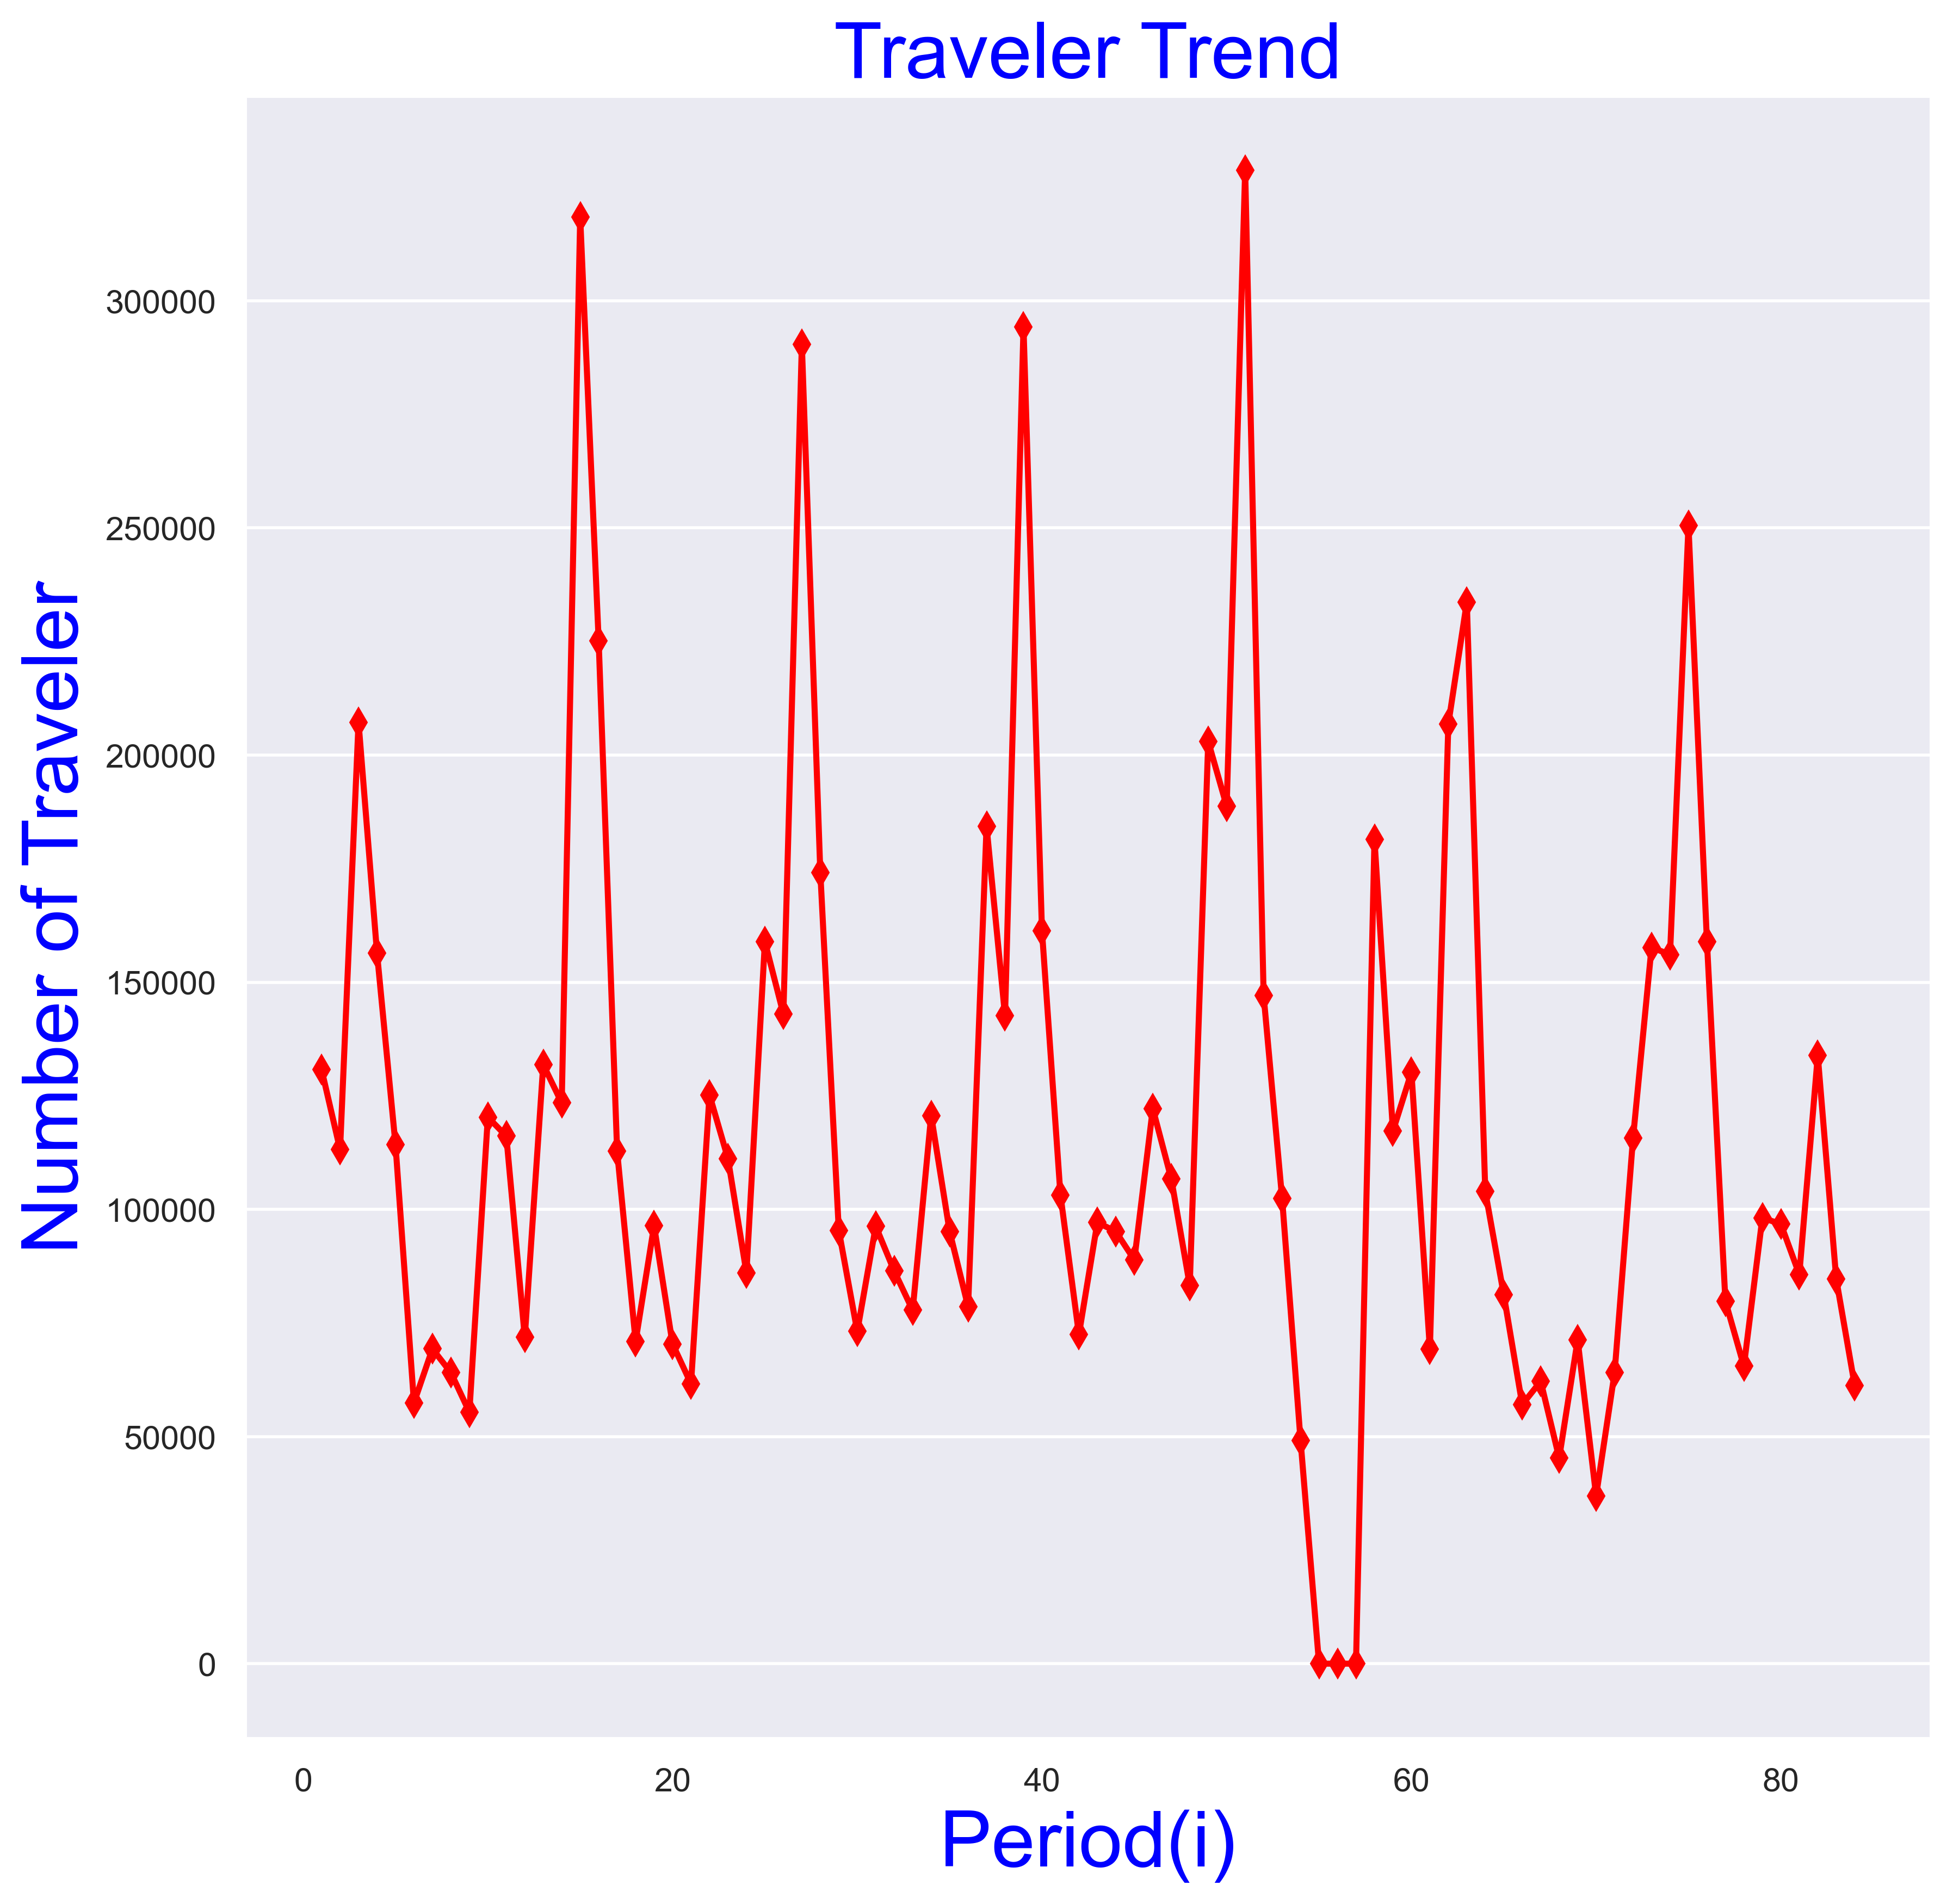

In [15]:
# Plot bar chart with trend.
plt.figure(figsize=[10,10], dpi=200)
plt.title('Traveler Trend',fontsize=26, color='blue')
plt.xlabel('Period(i)',fontsize=26, color='blue')
plt.ylabel('Number of Traveler',fontsize=26, color='blue')
plt.grid(linestyle='--',axis='x')
lines = plt.plot(x,ydata)
plt.setp(lines, color='red', linewidth=2.0, linestyle='-', marker='d')
plt.show()

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#228B22">
จากรูป ตัวอย่างจำนวนนักท่องเที่ยวของอุทยานแห่งชาติเขาใหญ่ จะพบว่า ไม่ว่าจะเป็นช่วงก่อนโควิด ปี2016-2019 ช่วงวิกฤติโควิด19 ปี2020-2021 หรือช่วงหลังวิกฤติโควิด19 จำนวนนักท่องเที่ยวจะสูงที่สุดในเดือนธันวาคมของทุกๆปี และมีความเป็น Seasonal อย่างชัดเจนตามรูปในกราฟเส้น Time Series</h1>

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#B24C00">
Part II. จริงหรือไม่ที่อุทยานที่มีพื้นที่ใหญ่กว่าสามารถสร้างรายได้จากนักท่องเที่ยวได้มากกว่าอุทยานที่มีพื้นที่เล็กกว่า (ปี 2016-2022)?</h1>

Area analysis data
- Load the area data.
- Drop column ปี, จังหวัด, พื้นที่(ไร่) and Check null value.
- Rename column หน่วยงาน,พื้นที่(ตร. กม.) and Change type of name to category.
- Check null value.
- Check duplicate data.
- Sort data by name and area and Remove duplicate data.
- Descending sort data by area.
- Select top10 maximum area.
- Plot top10 maximum area the natural park in bar chart format.

Revenue analysis data
- Load the revenue data.
- Check null value, Change type of column Name and Choose only column Name and Total.
- Join revenue data from every year.
- Check null value and Replace it by zero because no revenue in the natural park.
- Calculate total revenue from every year and select column only Name and Total.
- Descending sort the natural park by total revenue. 
- Select top10 maximum total revenue the natural park.
- Plot top10 maximum total revenue the natural park in bar chart format.

Revenue & Area analysis data
- Join revenue data and area data
- Delete null value row.
- Subplot all necessary graph for correlation analysis between total revenue and area.
- Plot the jointplot of total revenue and area.
- Plot kdeplot of total revenue and area.
- Calculate correlation between total revenue and area.
- Plot the heatmap of total revenue and area.
- Plot the pairplot of total revenue and area.
- Plot the lmplot of total revenue and area.

**หมายเหตุ ข้อนี้เป็นคำถามข้อที่2 เพื่อวิเคราะห์เรื่องการบริหารจัดการพื้นที่เขตอุทยานแห่งชาติ จากสมมติฐานที่ว่าเมื่อขยายพื้นที่เขตอุทยานแห่งชาติย่อมต้องเพิ่มงบประมาณในการบริหารพื้นที่เขตอุทยานตามไปด้วย ดังนั้นถ้ารายได้ของอุทยานไม่เพิ่มตามพื้นที่เขตอุทยานที่เพิ่มขึ้นย่อมจะทำให้สิ้นเปลืองงบประมาณของรัฐบาลโดยใช่เหตุ จึงไม่สมควรขยายพื้นที่อุทยานแห่งชาติในอนาคตและเอาประโยชน์จากที่ดินเหล่านั้นไปทำอย่างอื่นที่มีมูลค่ามากกว่า**

In [16]:
# Load the area data.
df_area = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/NP_Area.xls')
df_area

,ปี,หน่วยงาน,จังหวัด,พื้นที่ ตร.กม. (km2),พื้นที่ ไร่ (Rai)
0,2550,คลองลาน,กำแพงเพชร,300.000000,187500.00
1,2550,คลองวังเจ้า,กำแพงเพชร ตาก,747.000000,466875.00
2,2550,แม่วงก์,กำแพงเพชร นครสวรรค์,894.000000,558750.00
3,2550,ขุนแจ,เชียงราย,270.000000,168750.00
4,2550,ภูซาง,เชียงราย พะเยา,284.879392,178049.62
...,...,...,...,...,...
1748,2563,เขาสก,สุราษฎร์ธานี,738.740000,461712.50
1749,2563,แก่งกรุง,สุราษฎร์ธานี,541.000000,338125.00
1750,2563,ใต้ร่มเย็น,สุราษฎร์ธานี,425.000000,265625.00
1751,2563,คลองพนม,สุราษฎร์ธานี,410.400000,256500.00


In [17]:
# Drop column ปี, จังหวัด, พื้นที่(ไร่) and Check null value.
df_area = df_area.drop( columns=['ปี','จังหวัด',' พื้นที่ ไร่ (Rai)'] )
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   หน่วยงาน              1753 non-null   object 
 1   พื้นที่ ตร.กม. (km2)  1753 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.5+ KB


In [18]:
# Rename column หน่วยงาน,พื้นที่(ตร. กม.) and Change type of name to category.
cols={'หน่วยงาน':'Name','พื้นที่ ตร.กม. (km2)':'Area'}
df_area.rename(columns=cols, inplace=True)
df_area.Name = df_area.Name.astype('category')
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    1753 non-null   category
 1   Area    1753 non-null   float64 
dtypes: category(1), float64(1)
memory usage: 22.4 KB


In [19]:
# Check null value.
df_area.isnull().sum()

Name    0
Area    0
dtype: int64

In [20]:
# Check duplicate data.
df_area[df_area.duplicated(['Name','Area'])]

,Name,Area
108,คลองลาน,300.000000
109,คลองวังเจ้า,747.000000
110,แม่วงก์,894.000000
111,ขุนแจ,270.000000
112,ภูซาง,284.879392
...,...,...
1748,เขาสก,738.740000
1749,แก่งกรุง,541.000000
1750,ใต้ร่มเย็น,425.000000
1751,คลองพนม,410.400000


In [21]:
# Sort data by name and area and Remove duplicate data.
df_area = df_area.sort_values( ['Name','Area'], ascending=[True,True] ).reset_index(drop=True)
df_area.drop_duplicates(subset='Name',inplace=True,keep='last')
df_area

,Name,Area
13,กุยบุรี,969.0000
22,ขุนขาน,207.9344
34,ขุนน่าน,246.3712
46,ขุนพะวอ,396.7312
50,ขุนสถาน,342.4928
...,...,...
1696,แม่เมย,185.2800
1710,แหลมสน,315.0000
1724,ใต้ร่มเย็น,425.0000
1738,ไทรทอง,319.0000


In [22]:
# Descending sort data by area.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_area.sort_values('Area', ascending=False, inplace=True)

# Select top10 maximum area.
top10_area = df_area.head(10)
top10_area = top10_area.reset_index(drop=True)
top10_area

,Name,Area
0,แก่งกระจาน,2914.700544
1,ทับลาน,2235.800000
2,เขาใหญ่,2165.554448
3,ดอยภูคา,1704.000000
4,เขื่อนศรีนครินทร์,1532.000000
5,เขาแหลม,1496.956432
6,ตะรุเตา,1490.000000
7,ศรีลานนา,1406.000000
8,ทุ่งแสลงหลวง,1262.400000
9,ห้วยน้ำดัง,1252.120000


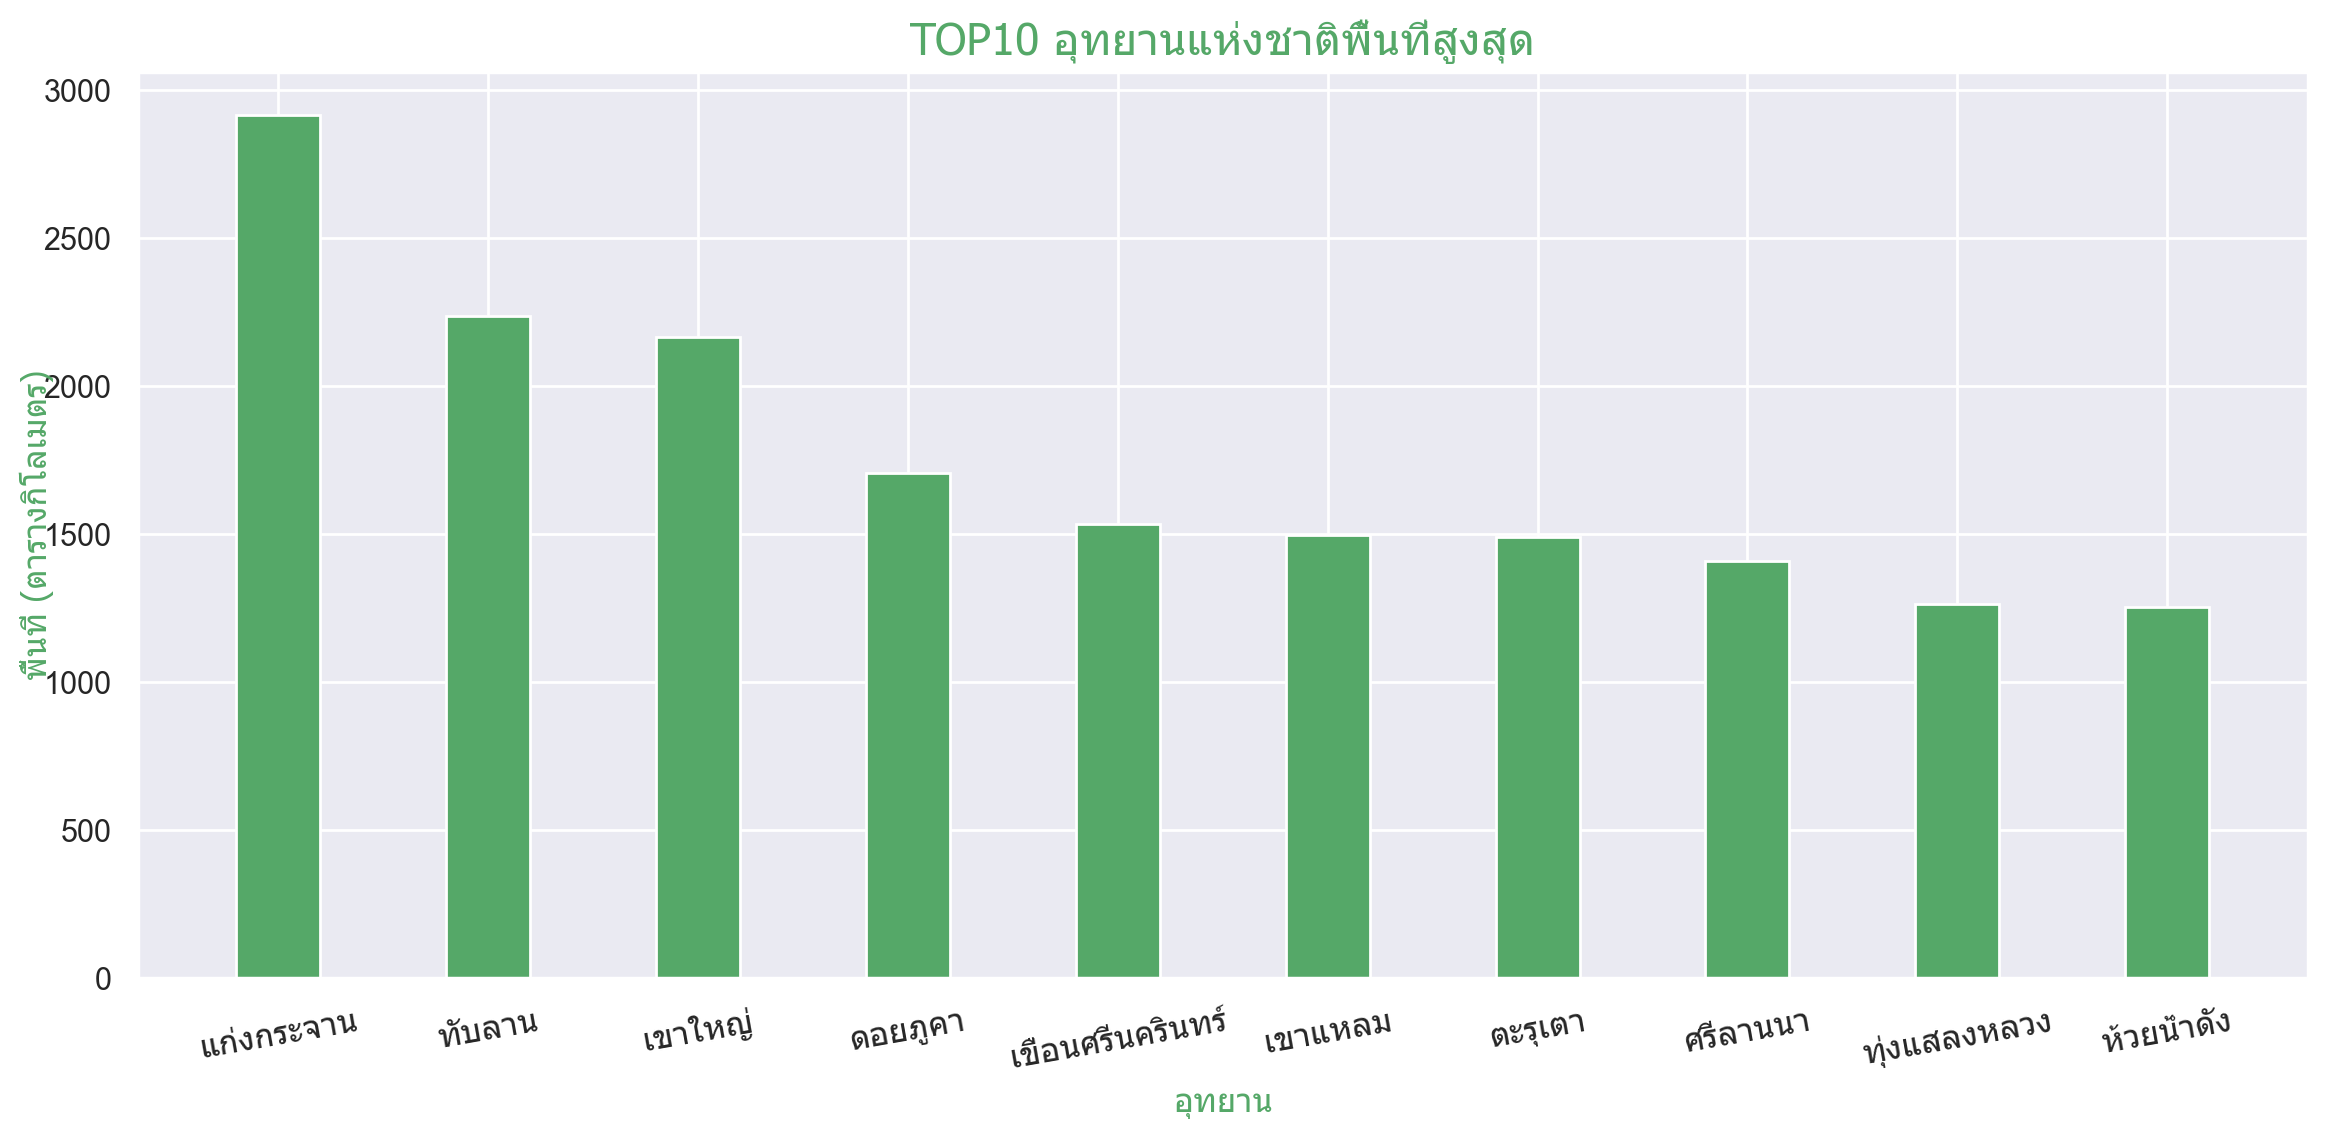

In [23]:
# Plot top10 maximum area the natural park in bar chart format.
a = np.arange(1,11)
adata = []
bdata = []
for i in range(0,10):
    adata.append(top10_area.iloc[(i,0)])
    bdata.append(top10_area.iloc[(i,1)])

plt.figure(figsize=[14,6],dpi=100)
ax = plt.axes(xticks=a) # กำหนดให้ขีดวางตรงทุกค่าตำแน่งที่ป้อนเข้าไป (คือ 1 ถึง 10)
ax.set_xticklabels(adata,rotation=10,fontname='Tahoma',fontsize='12') # ใส่ชื่ออุทยานลงไปแทนตัวเลข 1 ถึง 10
ax.set_title(u'TOP10 อุทยานแห่งชาติพื้นที่สูงสุด',fontname='Tahoma',fontsize='16',color='g')
ax.set_xlabel(u'อุทยาน',fontname='Tahoma',fontsize='12',color='g')
ax.set_ylabel(u'พื้นที่ (ตารางกิโลเมตร)',labelpad=-4,fontname='Tahoma',fontsize='12',color='g')

plt.savefig('TOP10 Area.png', dpi=1000, transparent=False)
plt.bar(a,bdata,color='g',width=0.4)
plt.show()

In [24]:
# Load the revenue data.
df_rv2016 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Revenue2016.xlsx')  
df_rv2017 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Revenue2017.xlsx')
df_rv2018 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Revenue2018.xlsx')  
df_rv2019 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Revenue2019.xlsx')
df_rv2020 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Revenue2020.xlsx')  
df_rv2021 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Revenue2021.xlsx')
df_rv2022 = pd.read_excel('https://github.com/Surawich2021/DADS5001-Surawich-6310422083/raw/main/Revenue2022.xlsx')

In [25]:
# Check null value, Change type of column Name and Choose only column Name and Total.
df_rv2016.isnull().sum()
df_rv2016.Name = df_rv2016.Name.astype('category')
df_rv2016 = df_rv2016.loc[ : , ['Name','Total 2016'] ] 
df_rv2016.info()

df_rv2017.isnull().sum()
df_rv2017.Name = df_rv2017.Name.astype('category')
df_rv2017 = df_rv2017.loc[ : , ['Name','Total 2017'] ]
df_rv2017.info()

df_rv2018.isnull().sum()
df_rv2018.Name = df_rv2018.Name.astype('category')
df_rv2018 = df_rv2018.loc[ : , ['Name','Total 2018'] ]
df_rv2018.info()

df_rv2019.isnull().sum()
df_rv2019.Name = df_rv2019.Name.astype('category')
df_rv2019 = df_rv2019.loc[ : , ['Name','Total 2019'] ]
df_rv2019.info()

df_rv2020.isnull().sum()
df_rv2020.Name = df_rv2020.Name.astype('category')
df_rv2020 = df_rv2020.loc[ : , ['Name','Total 2020'] ]
df_rv2020.info()

df_rv2021.isnull().sum()
df_rv2021.Name = df_rv2021.Name.astype('category')
df_rv2021 = df_rv2021.loc[ : , ['Name','Total 2021'] ]
df_rv2021.info()

df_rv2022.isnull().sum()
df_rv2022.Name = df_rv2022.Name.astype('category')
df_rv2022 = df_rv2022.loc[ : , ['Name','Total 2022'] ]
df_rv2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        127 non-null    category
 1   Total 2016  127 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 6.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        130 non-null    category
 1   Total 2017  130 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 6.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        131 non-null    category
 1   Total 2018  131 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 6.5 KB
<class 'pandas.core.frame

In [26]:
# Join revenue data from every year.
df_outer = pd.merge( df_rv2016, df_rv2017, left_on='Name', right_on='Name', how='outer' )
df_outer = pd.merge( df_outer, df_rv2018, left_on='Name', right_on='Name', how='outer' )
df_outer = pd.merge( df_outer, df_rv2019, left_on='Name', right_on='Name', how='outer' )
df_outer = pd.merge( df_outer, df_rv2020, left_on='Name', right_on='Name', how='outer' )
df_outer = pd.merge( df_outer, df_rv2021, left_on='Name', right_on='Name', how='outer' )
df_outer = pd.merge( df_outer, df_rv2022, left_on='Name', right_on='Name', how='outer' )
df_outer

,Name,Total 2016,Total 2017,Total 2018,Total 2019,Total 2020,Total 2021,Total 2022
0,เขาใหญ่,9.635335e+07,1.082271e+08,1.102038e+08,1.181513e+08,9.251458e+07,66342822.00,72907445.00
1,ทับลาน,1.093480e+06,1.213160e+06,1.324870e+06,1.713495e+06,1.769330e+06,933705.00,2350190.00
2,ปางสีดา,5.137000e+04,3.951420e+06,2.555000e+06,2.776100e+06,1.859528e+06,735970.00,1667055.00
3,ตาพระยา,3.716910e+06,6.232000e+04,9.857000e+04,8.114000e+04,7.745000e+04,38470.00,95020.00
4,น้ำตกสามหลั่น,1.024295e+06,1.382970e+06,1.794310e+06,1.814190e+06,1.571850e+06,1252220.00,1439140.00
5,เขาชะเมา-เขาวง,6.978310e+06,8.202790e+06,7.631140e+06,8.793915e+06,4.811500e+06,2612405.00,4858800.00
6,เขาแหลมหญ้า-หมู่เกาะเสม็ด,2.399851e+07,1.168979e+08,1.723183e+08,2.476529e+08,1.280823e+08,21469140.00,30725920.00
7,น้ำตกพลิ้ว,2.467488e+07,2.318773e+07,2.363334e+07,2.654501e+07,1.299444e+07,6390265.00,10236945.00
8,เขาคิชฌกูฎ,6.794123e+06,1.429001e+07,2.189183e+07,2.664279e+07,2.061846e+07,2012452.50,5130425.00
9,หมู่เกาะช้าง,3.039138e+07,3.427705e+07,3.493168e+07,2.932585e+07,1.870798e+07,4795480.00,7578485.00


In [27]:
# Check null value and Replace it by zero because no revenue in the natural park.
df_outer.isnull().sum()
colm = ['Total 2016','Total 2017','Total 2018','Total 2019','Total 2020','Total 2021','Total 2022']
df_outer[colm] = df_outer[colm].fillna(0)
df_outer.isnull().sum()

Name          0
Total 2016    0
Total 2017    0
Total 2018    0
Total 2019    0
Total 2020    0
Total 2021    0
Total 2022    0
dtype: int64

In [28]:
# Calculate total revenue from every year and select column only Name and Total.
df_outer['Total'] = df_outer['Total 2016'] + df_outer['Total 2017'] + df_outer['Total 2018'] + df_outer['Total 2019'] + df_outer['Total 2020'] + df_outer['Total 2021'] + df_outer['Total 2022']
df_outer.head()
df_outer = df_outer.loc[ : , ['Name','Total'] ]   # Choose columns
df_outer

,Name,Total
0,เขาใหญ่,6.647005e+08
1,ทับลาน,1.039823e+07
2,ปางสีดา,1.359644e+07
3,ตาพระยา,4.169880e+06
4,น้ำตกสามหลั่น,1.027898e+07
5,เขาชะเมา-เขาวง,4.388886e+07
6,เขาแหลมหญ้า-หมู่เกาะเสม็ด,7.411449e+08
7,น้ำตกพลิ้ว,1.276626e+08
8,เขาคิชฌกูฎ,9.738009e+07
9,หมู่เกาะช้าง,1.600079e+08


In [29]:
# Descending sort the natural park by total revenue. 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_outer.sort_values('Total', ascending=False, inplace=True)
df_outer

# Select top10 maximum total revenue the natural park.
top10 = df_outer.head(10)
top10 = top10.reset_index(drop=True)
top10

,Name,Total
0,หาดนพรัตน์ธารา-หมู่เกาะพีพี,2.506502e+09
1,อ่าวพังงา,1.626830e+09
2,หมู่เกาะสิมิลัน,1.564310e+09
3,เขาแหลมหญ้า-หมู่เกาะเสม็ด,7.411449e+08
4,เขาใหญ่,6.647005e+08
5,เอราวัณ,5.309911e+08
6,ดอยอินทนนท์,4.474507e+08
7,เขาสก,3.602225e+08
8,หมู่เกาะลันตา,2.540951e+08
9,หมู่เกาะช้าง,1.600079e+08


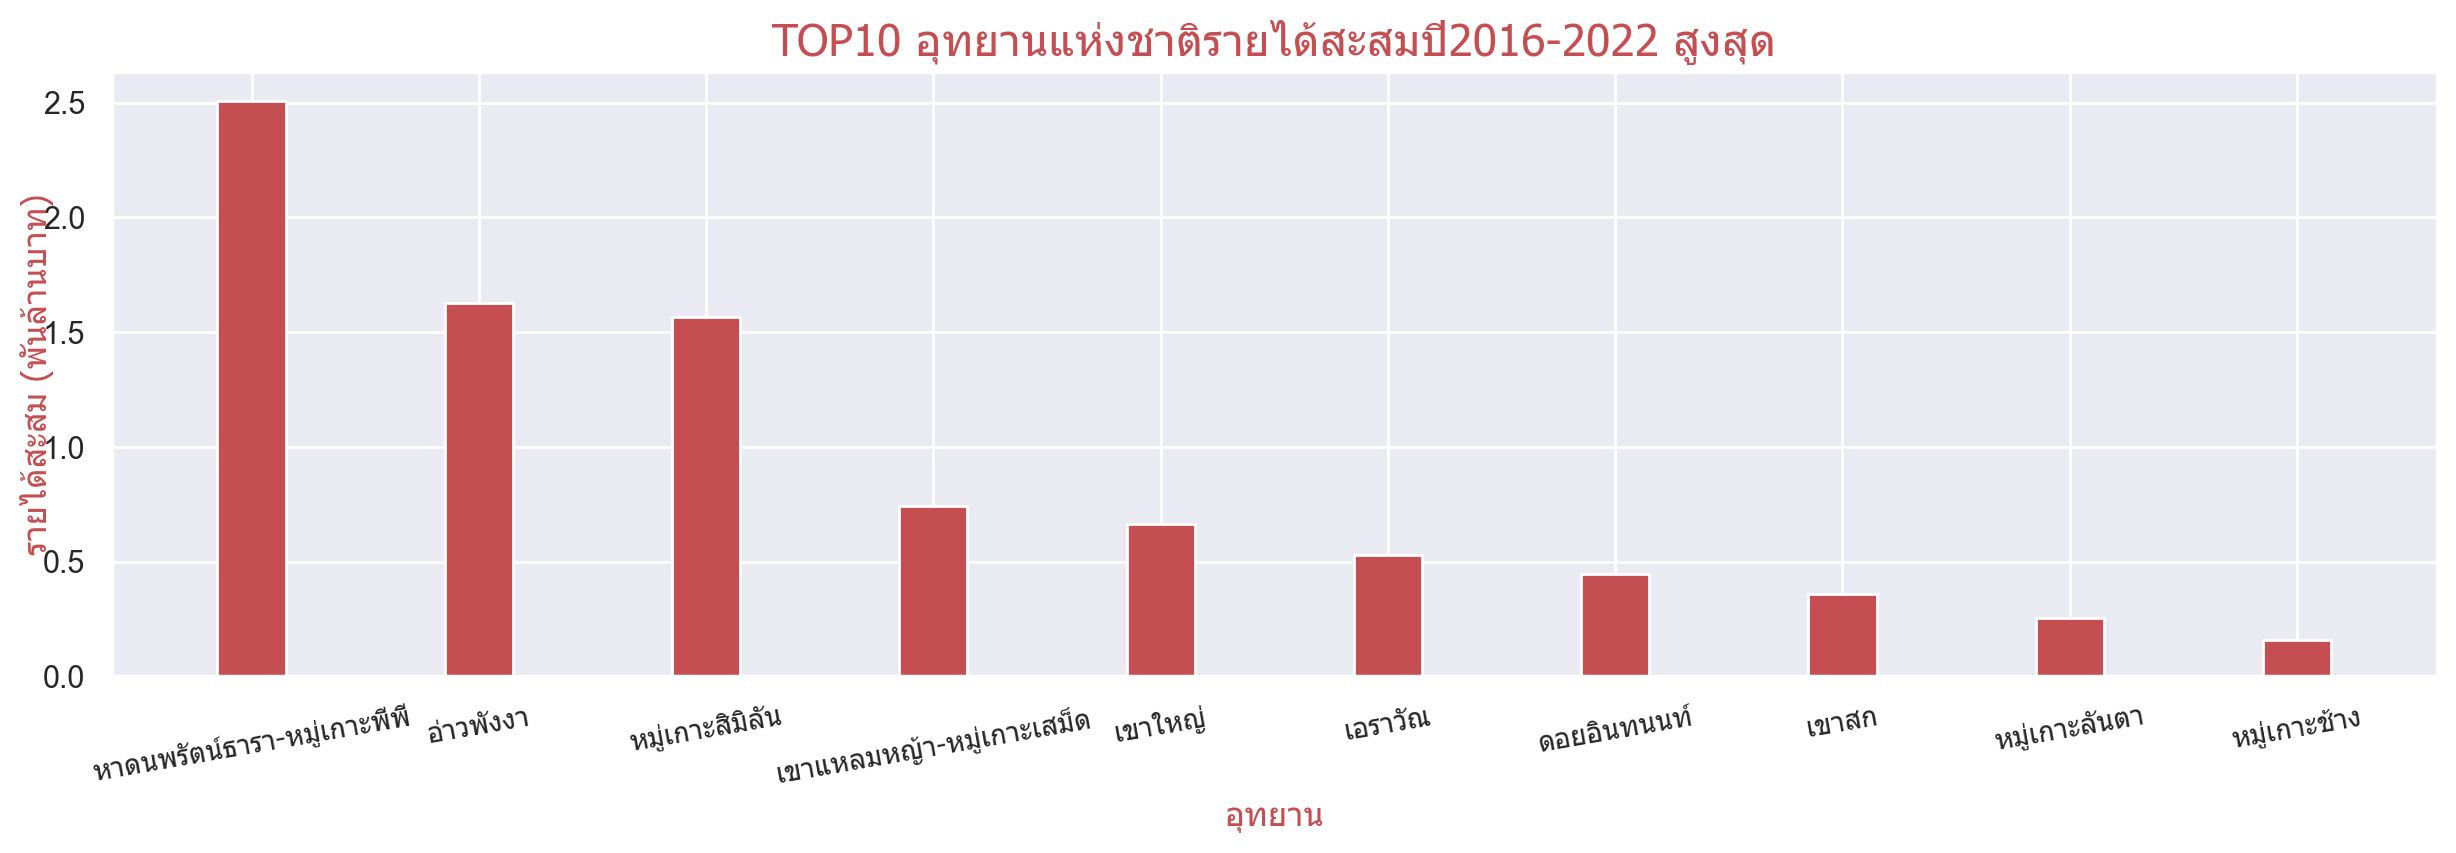

In [30]:
# Plot top10 maximum total revenue the natural park in bar chart format.
x = np.arange(1,11)
xdata = []
ydata = []
for i in range(0,10):
    xdata.append(top10.iloc[(i,0)])
    ydata.append((top10.iloc[(i,1)]/1000000000))

plt.figure(figsize=[15,4],dpi=100)
ax = plt.axes(xticks=x) # กำหนดให้ขีดวางตรงทุกค่าตำแน่งที่ป้อนเข้าไป (คือ 1 ถึง 10)
ax.set_xticklabels(xdata,rotation=10,fontname='Tahoma',fontsize='10') # ใส่ชื่อจังหวัดลงไปแทนตัวเลข 1 ถึง 10
ax.set_title(u'TOP10 อุทยานแห่งชาติรายได้สะสมปี2016-2022 สูงสุด',fontname='Tahoma',fontsize='16',color='r')
ax.set_xlabel(u'อุทยาน',fontname='Tahoma',fontsize='12',color='r')
ax.set_ylabel(u'รายได้สะสม (พันล้านบาท)',labelpad=-4,fontname='Tahoma',fontsize='12',color='r')

plt.savefig('TOP10 Revenue.png', dpi=100, transparent=False)
plt.bar(x,ydata,color='r',width=0.3)
plt.show()

In [31]:
# Join revenue data and area data.
df_rv_area = pd.merge( df_outer, df_area, left_on='Name', right_on='Name', how='outer' )
df_rv_area

,Name,Total,Area
0,หาดนพรัตน์ธารา-หมู่เกาะพีพี,2.506502e+09,387.899472
1,อ่าวพังงา,1.626830e+09,400.000000
2,หมู่เกาะสิมิลัน,1.564310e+09,140.000000
3,เขาแหลมหญ้า-หมู่เกาะเสม็ด,7.411449e+08,131.000000
4,เขาใหญ่,6.647005e+08,2165.554448
5,เอราวัณ,5.309911e+08,549.976000
6,ดอยอินทนนท์,4.474507e+08,482.400000
7,เขาสก,3.602225e+08,738.740000
8,หมู่เกาะลันตา,2.540951e+08,134.000000
9,หมู่เกาะช้าง,1.600079e+08,650.000000


In [32]:
# Delete null value row.
df_rv_area.dropna(inplace=True)
df_rv_area

,Name,Total,Area
0,หาดนพรัตน์ธารา-หมู่เกาะพีพี,2.506502e+09,387.899472
1,อ่าวพังงา,1.626830e+09,400.000000
2,หมู่เกาะสิมิลัน,1.564310e+09,140.000000
3,เขาแหลมหญ้า-หมู่เกาะเสม็ด,7.411449e+08,131.000000
4,เขาใหญ่,6.647005e+08,2165.554448
5,เอราวัณ,5.309911e+08,549.976000
6,ดอยอินทนนท์,4.474507e+08,482.400000
7,เขาสก,3.602225e+08,738.740000
8,หมู่เกาะลันตา,2.540951e+08,134.000000
9,หมู่เกาะช้าง,1.600079e+08,650.000000


C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Total'>

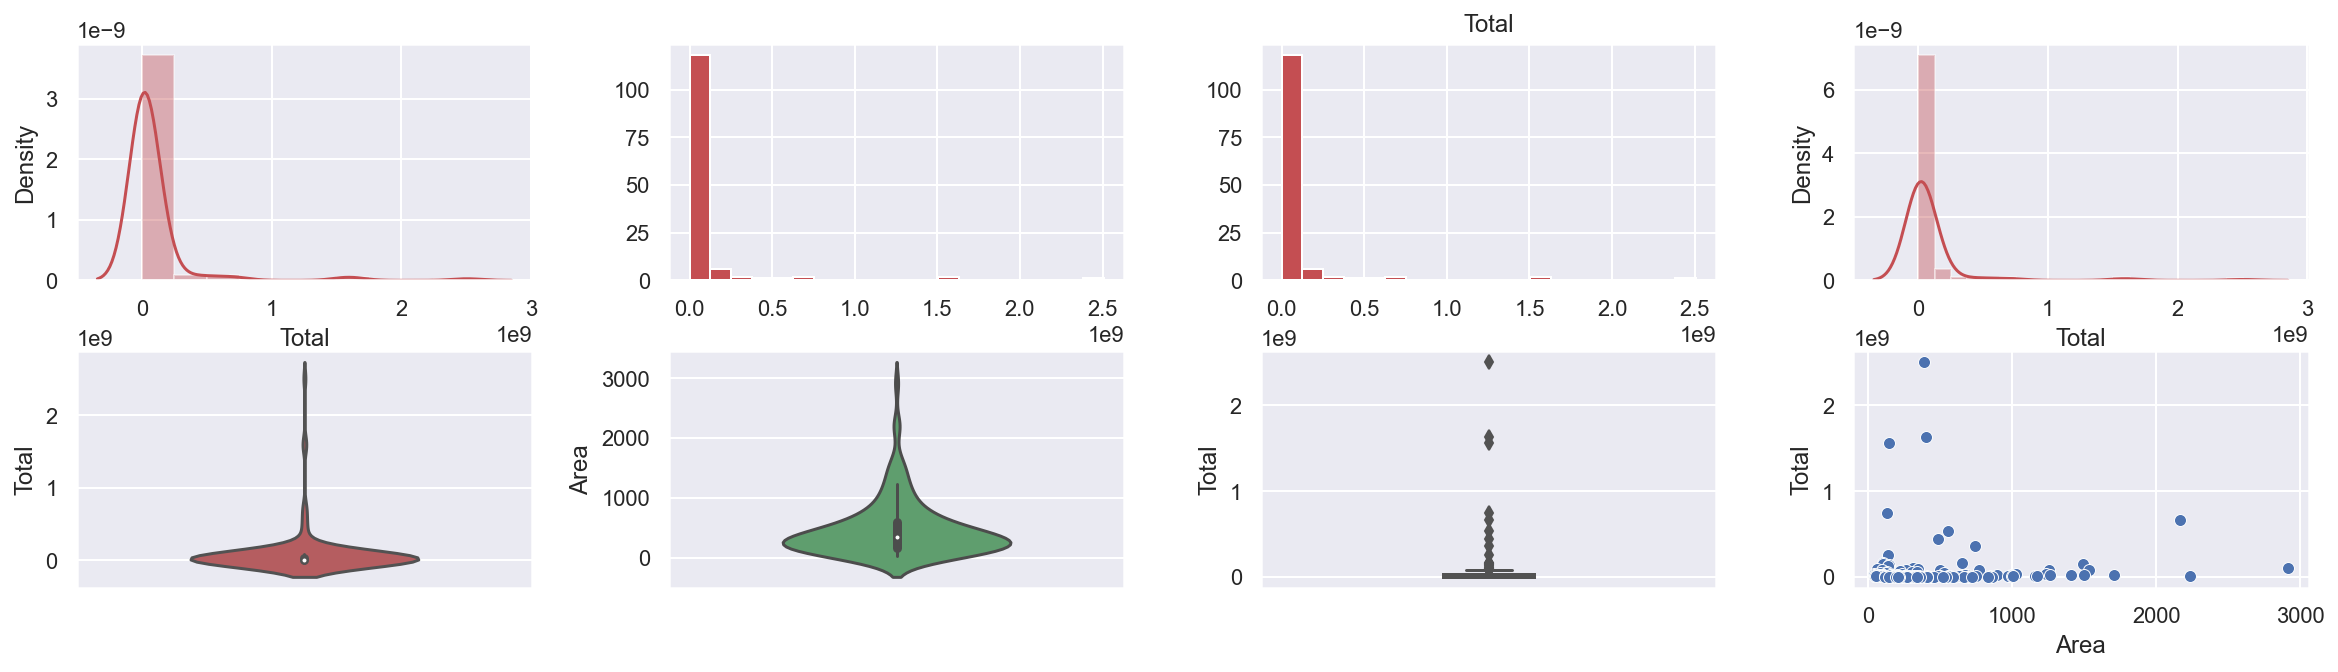

In [37]:
# Subplot all necessary grpah for correlation analysis between total revenue and area. 

f, axes = plt.subplots(2,4, figsize=(20,5))
# Plot the density graph of total revenue.
sns.distplot(df_rv_area.Total, bins=10,color='r',ax=axes[0][0])

# Plot the histogram graph of total revenue.(seaborn)
df_rv_area.Total.hist(bins=20,color='r',ax=axes[0][1])

# Plot the histogram graph of total revenue.(matplotlib)
df_rv_area.hist('Total',bins=20,color='r',ax=axes[0][2])

# Plot the kernel density estimation of total revenue.
sns.distplot(df_rv_area.Total, bins=20,color='r',ax=axes[0][3])

# Plot the violinplot of total revenue.
sns.violinplot(y='Total',data=df_rv_area,width=0.5,color='r',ax=axes[1][0])

# Plot the violinplot of area.
sns.violinplot(y='Area',data=df_rv_area,width=0.5,color='g',ax=axes[1][1])

# Plot the boxplot of total revenue.
sns.boxplot(y='Total',data=df_rv_area,width=0.2,color='r',ax=axes[1][2])

# Plot the scatter of total revenue and area.
sns.scatterplot(x='Area',y='Total',data=df_rv_area,ax=axes[1][3])

# Plot the jointplot of total revenue and area.
#sns.set(style="ticks")
#sns.jointplot(x='Area',y='Total',data=df_rv_area,ax=axes[2][2])

# Plot the jointplot of total revenue and area.
#sns.jointplot(x='Area',y='Total',data=df_rv_area,kind='kde',ax=axes[3][0])

# Plot the jointplot of total revenue and area.
#sns.jointplot(x='Area',y='Total',data=df_rv_area,kind='hex',ax=axes[3][1])



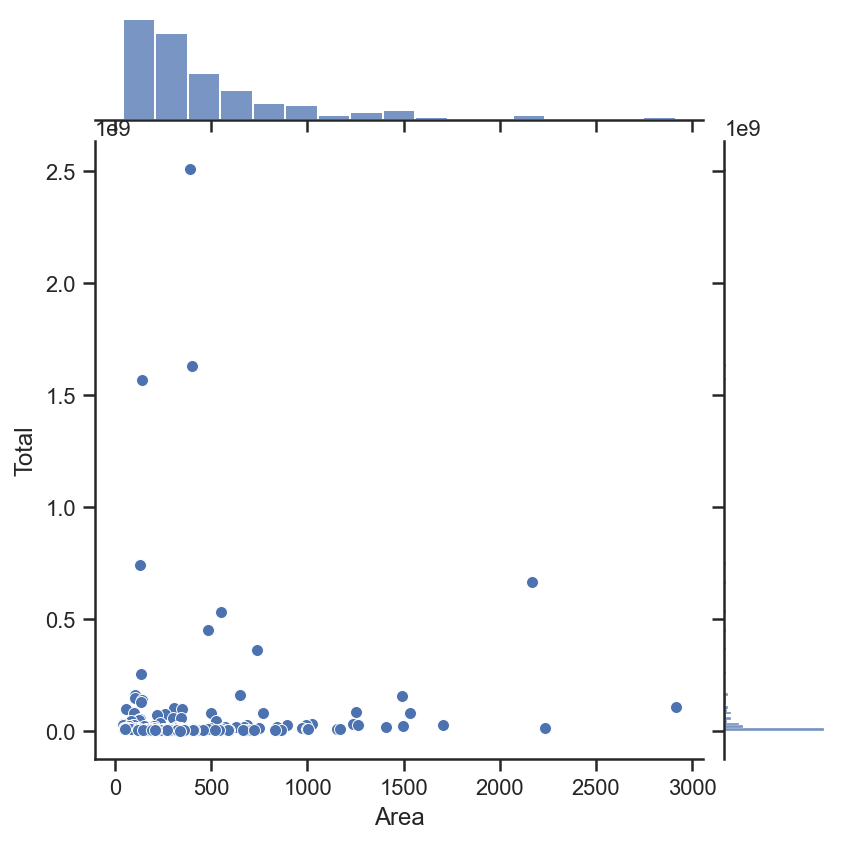

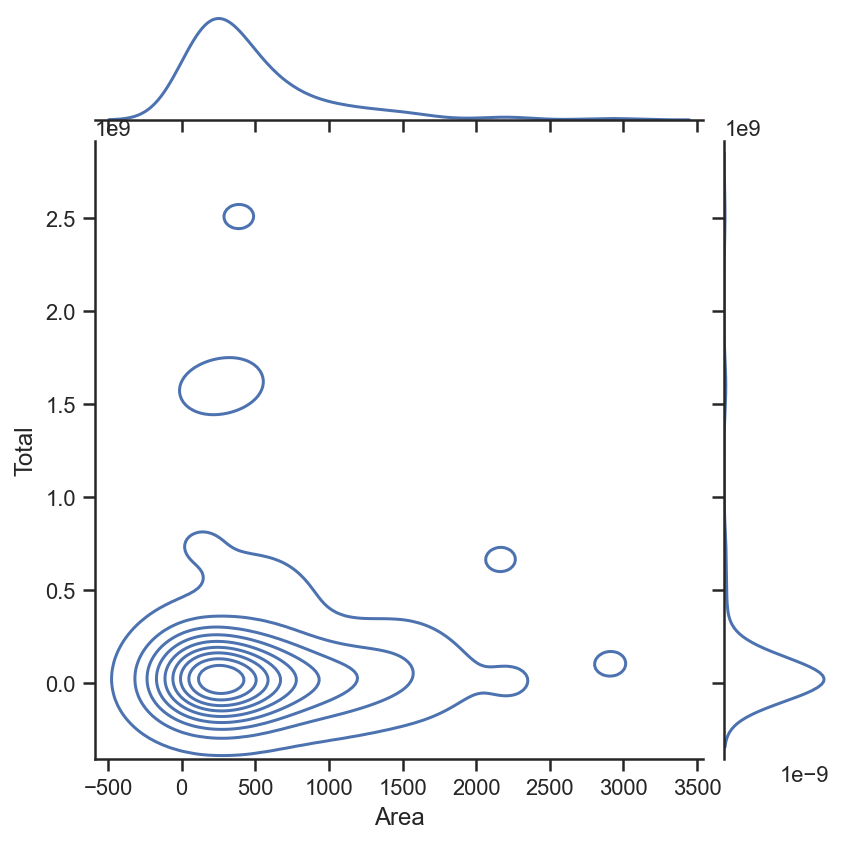

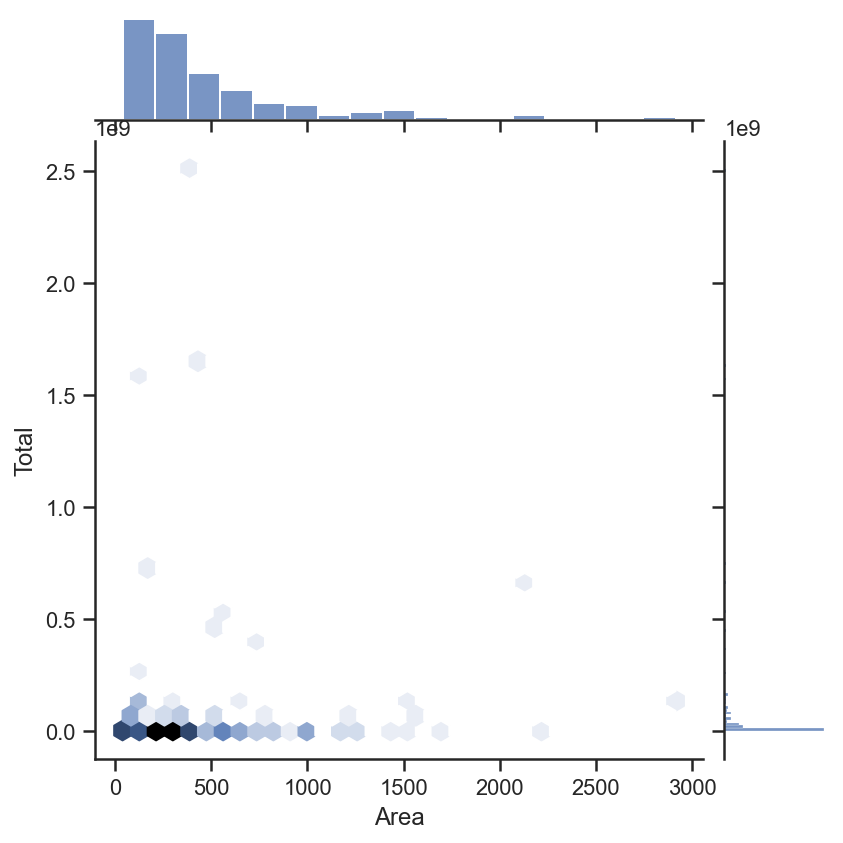

In [38]:
# Plot the jointplot of total revenue and area.
sns.set(style="ticks")
sns.jointplot(x='Area',y='Total',data=df_rv_area)
sns.jointplot(x='Area',y='Total',data=df_rv_area,kind='kde')
sns.jointplot(x='Area',y='Total',data=df_rv_area,kind='hex')

C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total', ylabel='Area'>

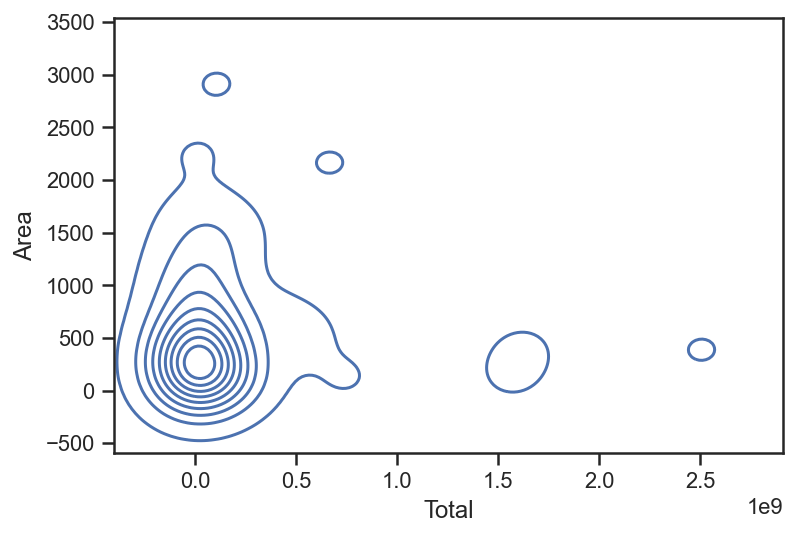

In [39]:
# Plot kdeplot of total revenue and area.
sns.kdeplot(df_rv_area['Total'],df_rv_area['Area'])

In [40]:
# Calculate correlation between total revenue and area.
columns = ['Total','Area']
corr_val = df_rv_area[columns].corr().round(2)
corr_val

,Total,Area
Total,1.00,0.02
Area,0.02,1.00


<AxesSubplot:>

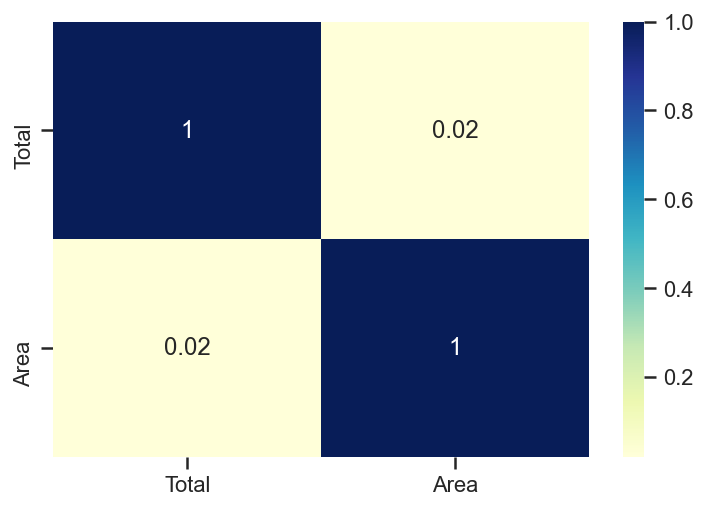

In [41]:
# Plot the heatmap of total revenue and area.
sns.heatmap(corr_val,annot=True,cmap='YlGnBu')

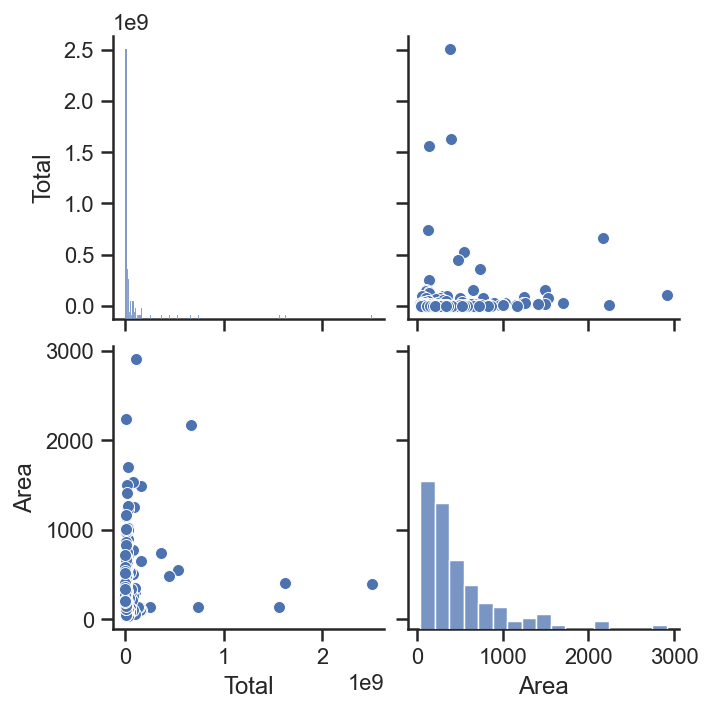

In [42]:
# Plot the pairplot of total revenue and area.
columns = ['Total','Area']
sns.pairplot(data=df_rv_area[columns])

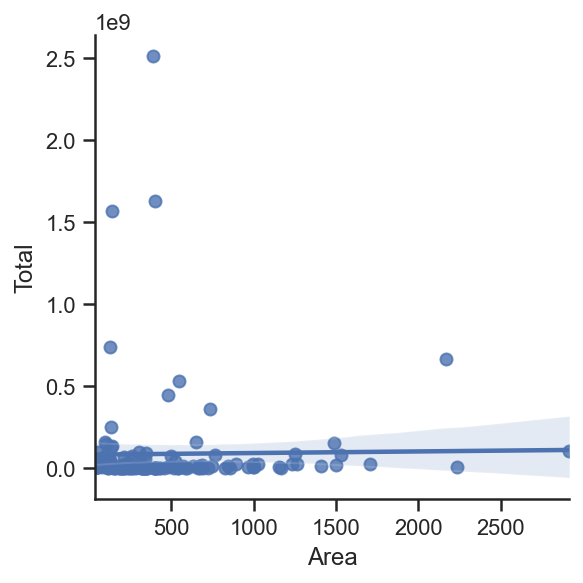

In [47]:
# Plot the lmplot of total revenue and area.
sns.lmplot(x='Area',y='Total',data=df_rv_area, height=4, aspect=1)

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#228B22">
Answer for Part II. จากรูปทั้งหมดของการเปรียบเทียบความสัมพันธ์ระหว่างรายได้รวมของอุทยานกับพื้นที่ของอุทยานทุกรูป พบว่าไม่มีความสัมพันธ์กันเลย นั่นหมายความว่าพื้นที่อุทยานที่มากขึ้นไม่ได้มีส่วนทำให้รายได้รวมของอุทยานเพิ่มขึ้นแต่อย่างใด ซึ่งต่อให้ผลลัพธ์มีความสัมพันธ์ไปในแนวทางเดียวกันเราก็ยังสรุปไม่ได้อยู่ดีว่าเป็นเหตุเป็นผลซึ่งกันและกัน</h1>

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#B24C00">
Part III. ถ้าจะจัดสรรงบประมาณเพื่อส่งเสริมการท่องเที่ยวอุทยานแห่งชาติ 10 อันดับแรกที่รัฐบาลควรส่งเสริมคือที่ไหนบ้าง (ตั้งแต่ปี 2023 เป็นต้นไป)?</h1>

Preliminary check the correlation between total traveler, total revenue and area.  
- Calculate total traveler data.
- Select column name and total traveler.
- Join traveler data and revenue with area data.
- Delete null value row.
- Calculate correlation between total revenue and area.
- Plot the heatmap of total revenue and area.
- Calculate revenue per traveler (THB / person)
- Calculate revenue per traveler score.
- Calculate traveler score.
- Calculate area score.
- Calculate correlation between total revenue and area.
- Plot the heatmap of total revenue and area.
- Plot the pairplot of total traveler and total revenue and area.
- Recheck total traveler and total revenue and area data.


Define the criteria for classifying the type of natural park.
- Define the type of natural park with following criteria.

Group "Star": R-score>=1 and T-score>=1

Group "Cash Cow": R-score>=1 and T-score<1

Group "Question": R-score=<1 and T-score>=1

Group "Dog": R-score<1 and T-score<1
- Combine all group of the natural park
- Recheck data after combination.
- Recheck column after combination.
- Plot the pairplot of data.


Apply K-Mean clustering algorithm.
- Apply K-Mean clustering algorithm k =4 to classify the type of natural park.
- Import sklearn library.
- Define X data for K-Mean model. 
- Run model.
- Check centroid data.
- Plot data with centroid. 
- Recheck the group name. 
- Validate the model accuracy by using train data.
- Input the test data for checking the predicted result. 

Apply Elbow method to find out the best k-value.
- Try to visualize data with different k-value and Check the inertia value. 
- Print the result of inertia.
- Plot data to check elbow and Select the best k-value.

Plot the star group of natural park in bar chart format.
- Select the star group.
- Plot the star group of natural park in bar chart format.

**หมายเหตุ 
    ข้อนี้เป็นคำถามข้อที่3 ที่สำคัญมากที่สุด !!! โดยเราจะแบ่งกลุ่มอุทยานแห่งชาติตามศักยภาพที่ทำรายได้ต่อจำนวนนักท่องเที่ยวมากที่สุด เพื่อให้รัฐบาลสามารถจัดสรรงบประมาณเพื่อโปรโมตการท่องเที่ยวได้ตรงกับกลุ่มนักท่องเที่ยวมากยึ่งขึ้น ซึ่งจากข้อที่แล้วเราพบว่าพื้นที่อุทยานไม่มีความสัมพันธ์กับรายได้ของอุทยาน 
    ดังนั้นเราจึงนำจำนวนนักท่องเที่ยวที่เข้ามาเที่ยวในอุทยานกับรายได้ของแต่ล่ะอุทยานมาใช้ในการคำนวนเพื่อแบ่งกลุ่มอุทยานแห่งชาติแทน (Clustering)**</h1>

In [48]:
# Calculate total traveler data.
df_tot_trv['Total_Trv'] = df_tot_trv['Oct 2015']+ df_tot_trv['Nov 2015']+ df_tot_trv['Dec 2015']+ df_tot_trv['Jan 2016']+ df_tot_trv['Feb 2016']+ df_tot_trv['Mar 2016']+ df_tot_trv['Apr 2016']+ df_tot_trv['May 2016']+ df_tot_trv['Jun 2016']+ df_tot_trv['Jul 2016']+ df_tot_trv['Aug 2016'] + df_tot_trv['Sep 2016']+ df_tot_trv['Oct 2016']+ df_tot_trv['Nov 2016']+ df_tot_trv['Dec 2016']+ df_tot_trv['Jan 2017']+ df_tot_trv['Feb 2017']+ df_tot_trv['Mar 2017']+ df_tot_trv['Apr 2017']+ df_tot_trv['May 2017']+ df_tot_trv['Jun 2017']+ df_tot_trv['Jul 2017']+ df_tot_trv['Aug 2017']+ df_tot_trv['Sep 2017']+ df_tot_trv['Oct 2017']+ df_tot_trv['Nov 2017']+ df_tot_trv['Dec 2017']+ df_tot_trv['Jan 2018']+ df_tot_trv['Feb 2018']+ df_tot_trv['Mar 2018']+ df_tot_trv['Apr 2018']+ df_tot_trv['May 2018']+ df_tot_trv['Jun 2018']+ df_tot_trv['Jul 2018']+ df_tot_trv['Aug 2018']+ df_tot_trv['Sep 2018']+ df_tot_trv['Oct 2018']+ df_tot_trv['Nov 2018']+ df_tot_trv['Dec 2018']+ df_tot_trv['Jan 2019']+ df_tot_trv['Feb 2019']+ df_tot_trv['Mar 2019']+ df_tot_trv['Apr 2019']+ df_tot_trv['May 2019']+ df_tot_trv['Jun 2019']+ df_tot_trv['Jul 2019']+ df_tot_trv['Aug 2019']+ df_tot_trv['Sep 2019']+ df_tot_trv['Oct 2019']+ df_tot_trv['Nov 2019']+ df_tot_trv['Dec 2019']+ df_tot_trv['Jan 2020']+ df_tot_trv['Feb 2020']+ df_tot_trv['Mar 2020']+ df_tot_trv['Apr 2020']+ df_tot_trv['May 2020']+ df_tot_trv['Jun 2020']+ df_tot_trv['Jul 2020']+ df_tot_trv['Aug 2020']+ df_tot_trv['Sep 2020']+ df_tot_trv['Oct 2020']+ df_tot_trv['Nov 2020']+ df_tot_trv['Dec 2020']+ df_tot_trv['Jan 2021']+ df_tot_trv['Feb 2021']+ df_tot_trv['Mar 2021']+ df_tot_trv['Apr 2021']+ df_tot_trv['May 2021']+ df_tot_trv['Jun 2021']+ df_tot_trv['Jul 2021']+ df_tot_trv['Aug 2021']+ df_tot_trv['Sep 2021']+ df_tot_trv['Oct 2021']+ df_tot_trv['Nov 2021']+ df_tot_trv['Dec 2021']+ df_tot_trv['Jan 2022']+ df_tot_trv['Feb 2022']+ df_tot_trv['Mar 2022']+ df_tot_trv['Apr 2022']+ df_tot_trv['May 2022']+ df_tot_trv['Jun 2022']+ df_tot_trv['Jul 2022']+ df_tot_trv['Aug 2022']+ df_tot_trv['Sep 2022']

In [49]:
# Select column name and total traveler.
df_tot_trv = df_tot_trv.loc[ : , ['Name','Total_Trv'] ]   # Choose columns
df_tot_trv

,Name,Total_Trv
0,เขาใหญ่,9875203.0
1,ทับลาน,371951.0
2,ปางสีดา,413177.0
3,ตาพระยา,16074.0
4,น้ำตกสามหลั่น,298527.0
5,น้ำตกเจ็ดสาวน้อย,2280291.0
6,หมู่เกาะช้าง,1512767.0
7,เขาแหลมหญ้า-หมู่เกาะเสม็ด,6234890.0
8,น้ำตกพลิ้ว,3387703.0
9,เขาชะเมา-เขาวง,1036472.0


In [50]:
# Join traveler data and revenue with area data.
df_trv_rv_area = pd.merge( df_tot_trv, df_rv_area, left_on='Name', right_on='Name', how='outer' )

# Delete null value row.
df_trv_rv_area.dropna(inplace=True)
df_trv_rv_area = df_trv_rv_area.reset_index(drop=True)
df_trv_rv_area

,Name,Total_Trv,Total,Area
0,เขาใหญ่,9875203.0,6.647005e+08,2165.554448
1,ทับลาน,371951.0,1.039823e+07,2235.800000
2,ปางสีดา,413177.0,1.359644e+07,844.000000
3,ตาพระยา,16074.0,4.169880e+06,594.000000
4,น้ำตกสามหลั่น,298527.0,1.027898e+07,44.570000
5,น้ำตกเจ็ดสาวน้อย,2280291.0,2.809644e+07,41.980800
6,หมู่เกาะช้าง,1512767.0,1.600079e+08,650.000000
7,เขาแหลมหญ้า-หมู่เกาะเสม็ด,6234890.0,7.411449e+08,131.000000
8,น้ำตกพลิ้ว,3387703.0,1.276626e+08,134.500000
9,เขาชะเมา-เขาวง,1036472.0,4.388886e+07,83.680000


In [51]:
# Calculate correlation between total revenue and area.
columns = ['Total_Trv','Total','Area']
corr_val2 = df_trv_rv_area[columns].corr().round(2)
corr_val2

,Total_Trv,Total,Area
Total_Trv,1.00,0.77,0.12
Total,0.77,1.00,0.02
Area,0.12,0.02,1.00


<AxesSubplot:>

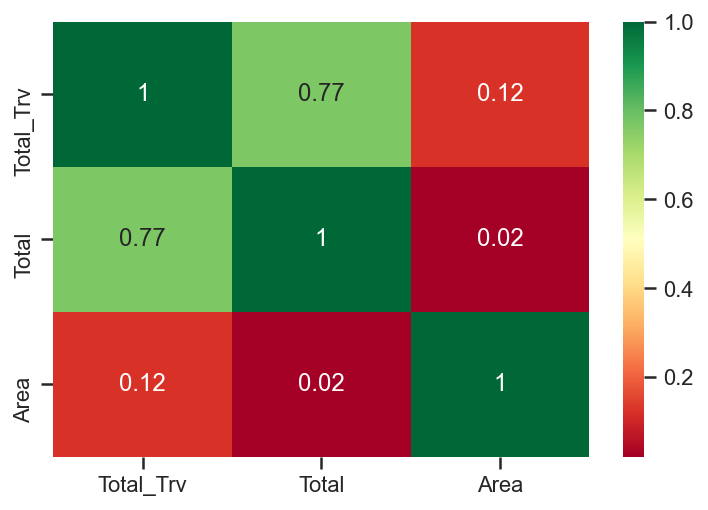

In [52]:
# Plot the heatmap of total revenue and area.
sns.heatmap(corr_val2,annot=True,cmap='RdYlGn')

In [53]:
# Calculate revenue per traveler (THB / person)
df_trv_rv_area['Rv_Trv'] = df_trv_rv_area['Total'] / df_trv_rv_area['Total_Trv']
df_trv_rv_area['Rv_Trv']

0       67.310057
1       27.955914
2       32.907066
3      259.417693
4       34.432313
5       12.321427
6      105.771685
7      118.870573
8       37.684120
9       42.344472
10      23.316503
11      31.540176
12      44.236964
13     107.938686
14     149.215999
15     105.597070
16      58.168831
17      43.601193
18      50.911867
19      65.795776
20       7.465231
21      39.082638
22     133.952363
23     117.831452
24      80.125514
25      33.702422
26      92.979596
27     166.900646
28     223.182000
29      60.352323
30      56.622981
31      36.871186
32      28.773475
33      38.727509
34      57.872075
35      14.163373
36      23.525534
37      65.379310
38      39.035447
39     310.488997
40     271.363980
41     427.404568
42     464.054404
43      53.384079
44     109.821922
45     230.299014
46      95.727181
47      22.143615
48      34.393781
49     152.348228
50      22.569554
51      59.667254
52      54.911336
53      66.835715
54      64.267252
55      21

In [54]:
# Calculate revenue per traveler score.
df_trv_rv_area['R-score'] =  (df_trv_rv_area['Rv_Trv'])/(df_trv_rv_area['Rv_Trv'].sum())*100
df_trv_rv_area['R-score']

0      0.771265
1      0.320330
2      0.377062
3      2.972509
4      0.394539
5      0.141184
6      1.211973
7      1.362065
8      0.431799
9      0.485200
10     0.267170
11     0.361400
12     0.506884
13     1.236804
14     1.709775
15     1.209972
16     0.666521
17     0.499600
18     0.583368
19     0.753914
20     0.085540
21     0.447824
22     1.534879
23     1.350159
24     0.918109
25     0.386176
26     1.065397
27     1.912413
28     2.557307
29     0.691541
30     0.648808
31     0.422484
32     0.329698
33     0.443755
34     0.663121
35     0.162289
36     0.269565
37     0.749142
38     0.447283
39     3.557704
40     3.109395
41     4.897369
42     5.317317
43     0.611696
44     1.258382
45     2.638856
46     1.096879
47     0.253730
48     0.394097
49     1.745666
50     0.258611
51     0.683691
52     0.629196
53     0.765830
54     0.736399
55     0.245319
56     1.414864
57     0.206140
58     0.037470
59     0.193677
60     0.244976
61     0.325762
62     0

In [55]:
# Calculate traveler score.
df_trv_rv_area['T-score'] =  (df_trv_rv_area['Total_Trv'])/(df_trv_rv_area['Total_Trv'].sum())*100
df_trv_rv_area['T-score']

0      9.767585
1      0.367898
2      0.408674
3      0.015899
4      0.295274
5      2.255441
6      1.496281
7      6.166944
8      3.350785
9      1.025177
10     4.130931
11     0.125557
12     0.053244
13     0.734231
14     3.519760
15     0.733651
16     0.339050
17     0.224240
18     0.565758
19     0.026836
20     0.349768
21     0.081318
22     0.775793
23     0.092808
24     0.941945
25     0.148044
26     0.254784
27     2.134784
28     0.701167
29     0.237111
30     0.183620
31     0.101572
32     0.552337
33     0.006102
34     0.011118
35     0.625806
36     0.109236
37     0.003729
38     0.393135
39     7.984781
40     5.929677
41     0.312726
42     3.334227
43     0.631406
44     1.401184
45     1.091303
46     0.255742
47     0.493371
48     0.050196
49     0.952510
50     0.563784
51     0.075785
52     0.115182
53     0.286167
54     0.088166
55     0.085561
56     0.391045
57     0.016808
58     0.706081
59     0.078956
60     0.587244
61     0.169476
62     1

In [56]:
# Calculate area score.
df_trv_rv_area['A-score'] =  (df_trv_rv_area['Area'])/(df_trv_rv_area['Area'].sum())*100
df_trv_rv_area['A-score']

0      3.404557
1      3.514992
2      1.326887
3      0.933852
4      0.070070
5      0.066000
6      1.021892
7      0.205950
8      0.211453
9      0.131557
10     0.091672
11     0.311158
12     0.185460
13     2.408520
14     0.864640
15     0.786070
16     2.353426
17     0.092756
18     1.942447
19     1.057419
20     0.516829
21     0.499116
22     4.582320
23     1.523404
24     0.154196
25     0.253115
26     0.059741
27     1.161403
28     0.160358
29     0.498369
30     0.495224
31     0.668160
32     1.050190
33     0.850528
34     0.645207
35     0.067579
36     0.251543
37     0.560784
38     0.896120
39     0.609833
40     0.628856
41     0.222067
42     0.220100
43     0.362957
44     2.342490
45     0.210667
46     0.141493
47     0.322289
48     0.644253
49     0.163503
50     0.777234
51     0.308140
52     0.386872
53     0.113194
54     0.078796
55     0.227960
56     0.196518
57     0.333294
58     1.091066
59     0.410329
60     0.109376
61     0.536100
62     0

In [57]:
# Calculate correlation between total revenue and area.
columns = ['T-score','R-score','A-score']
corr_val3 = df_trv_rv_area[columns].corr().round(2)
corr_val3

,T-score,R-score,A-score
T-score,1.00,0.37,0.12
R-score,0.37,1.00,0.01
A-score,0.12,0.01,1.00


<AxesSubplot:>

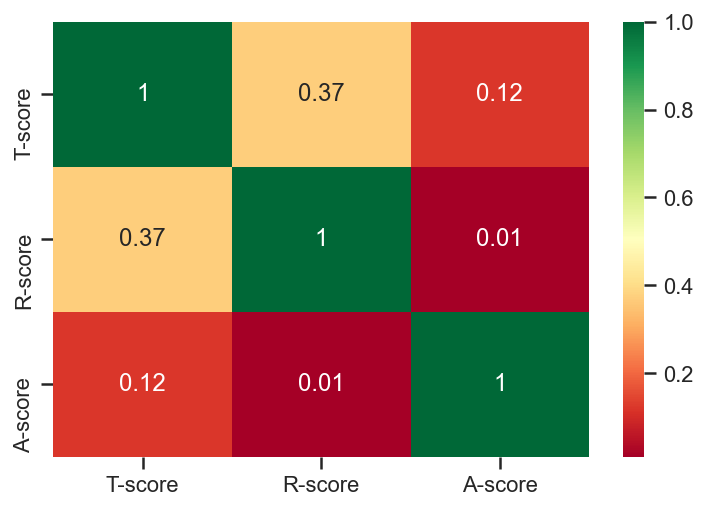

In [58]:
# Plot the heatmap of total revenue and area.
sns.heatmap(corr_val3,annot=True,cmap='RdYlGn')

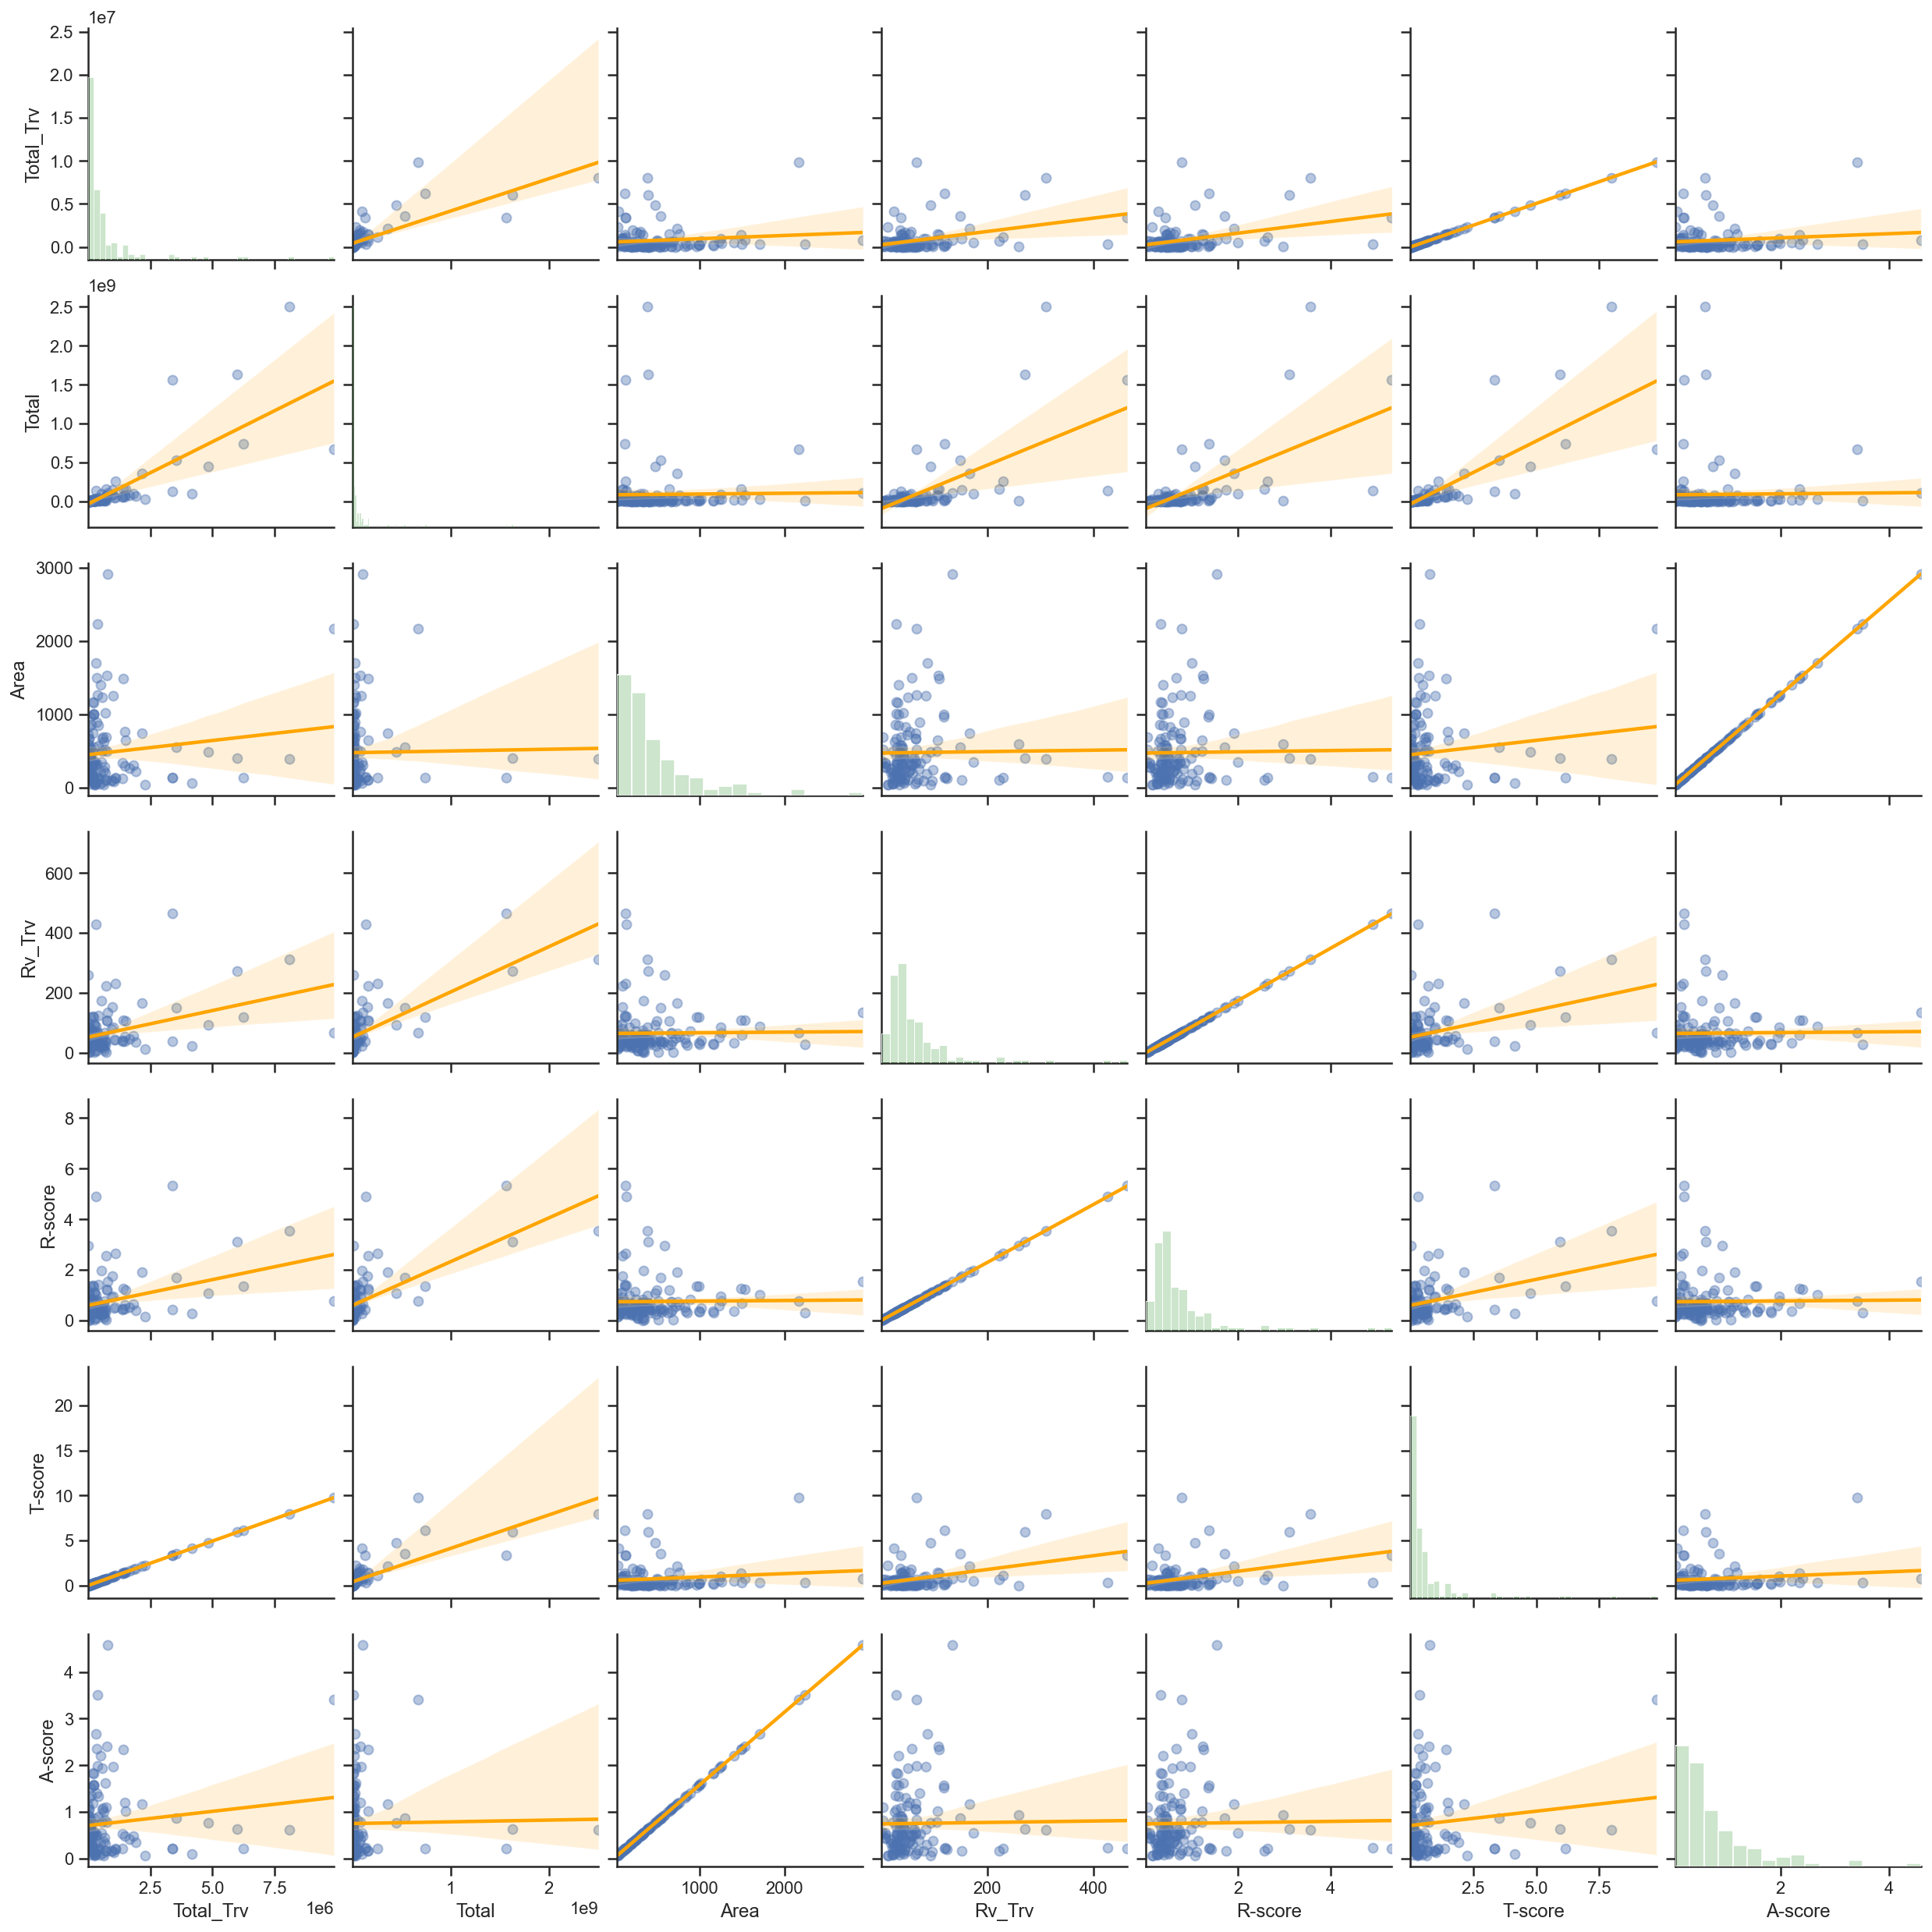

In [59]:
# Plot the pairplot of total traveler and total revenue and area.
sns.pairplot(df_trv_rv_area,
             kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.4},
                       'line_kws':{'color':'orange'}},
             diag_kws={'color':'green','alpha':.2});

In [60]:
# Recheck total traveler and total revenue and area data.
df_trv_rv_area

,Name,Total_Trv,Total,Area,Rv_Trv,R-score,T-score,A-score
0,เขาใหญ่,9875203.0,6.647005e+08,2165.554448,67.310057,0.771265,9.767585,3.404557
1,ทับลาน,371951.0,1.039823e+07,2235.800000,27.955914,0.320330,0.367898,3.514992
2,ปางสีดา,413177.0,1.359644e+07,844.000000,32.907066,0.377062,0.408674,1.326887
3,ตาพระยา,16074.0,4.169880e+06,594.000000,259.417693,2.972509,0.015899,0.933852
4,น้ำตกสามหลั่น,298527.0,1.027898e+07,44.570000,34.432313,0.394539,0.295274,0.070070
5,น้ำตกเจ็ดสาวน้อย,2280291.0,2.809644e+07,41.980800,12.321427,0.141184,2.255441,0.066000
6,หมู่เกาะช้าง,1512767.0,1.600079e+08,650.000000,105.771685,1.211973,1.496281,1.021892
7,เขาแหลมหญ้า-หมู่เกาะเสม็ด,6234890.0,7.411449e+08,131.000000,118.870573,1.362065,6.166944,0.205950
8,น้ำตกพลิ้ว,3387703.0,1.276626e+08,134.500000,37.684120,0.431799,3.350785,0.211453
9,เขาชะเมา-เขาวง,1036472.0,4.388886e+07,83.680000,42.344472,0.485200,1.025177,0.131557


In [61]:
# Define the type of natural park group "Star".
# Group"Star": R-score>=1 and T-score>=1
# Group "Cash Cow": R-score>=1 and T-score<1
# Group "Question": R-score<1 and T-score>1
# Group "Dog": R-score<1 and T-score<1
condition_1 = df_trv_rv_area['R-score'] >= 1
condition_2 = df_trv_rv_area['T-score'] >= 1
df1 = df_trv_rv_area[(condition_1)&(condition_2)]
df1['Group'] = ' '
df1['Cluster'] = ' '
df1.Group = df1.Group.astype('category')
df1['Group'] = 'Star'
df1['Cluster'] = 1
df1 = df1.sort_values( ['R-score','T-score'], ascending=[False,False] ).reset_index(drop=True)
df1

C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Name,Total_Trv,Total,Area,Rv_Trv,R-score,T-score,A-score,Group,Cluster
0,หมู่เกาะสิมิลัน,3370963.0,1.564310e+09,140.000000,464.054404,5.317317,3.334227,0.220100,Star,1
1,หาดนพรัตน์ธารา-หมู่เกาะพีพี,8072756.0,2.506502e+09,387.899472,310.488997,3.557704,7.984781,0.609833,Star,1
2,อ่าวพังงา,5995009.0,1.626830e+09,400.000000,271.363980,3.109395,5.929677,0.628856,Star,1
3,หมู่เกาะลันตา,1103327.0,2.540951e+08,134.000000,230.299014,2.638856,1.091303,0.210667,Star,1
4,เขาสก,2158305.0,3.602225e+08,738.740000,166.900646,1.912413,2.134784,1.161403,Star,1
5,เอราวัณ,3558540.0,5.309911e+08,549.976000,149.215999,1.709775,3.519760,0.864640,Star,1
6,เขาแหลมหญ้า-หมู่เกาะเสม็ด,6234890.0,7.411449e+08,131.000000,118.870573,1.362065,6.166944,0.205950,Star,1
7,ตะรุเตา,1416622.0,1.555762e+08,1490.000000,109.821922,1.258382,1.401184,2.342490,Star,1
8,หมู่เกาะช้าง,1512767.0,1.600079e+08,650.000000,105.771685,1.211973,1.496281,1.021892,Star,1
9,ดอยอินทนนท์,4820941.0,4.474507e+08,482.400000,92.813986,1.063499,4.768404,0.758401,Star,1


In [62]:
# Define the type of natural park group "Cash Cow".
condition_3 = df_trv_rv_area['R-score'] >= 1
condition_4 = df_trv_rv_area['T-score'] < 1
df2 = df_trv_rv_area[(condition_3)&(condition_4)]
df2['Group'] = ' '
df2['Cluster'] = ' '
df2.Group = df2.Group.astype('category')
df2['Group'] = 'Cash Cow'
df2['Cluster'] = 2
df2 = df2.sort_values( ['R-score','T-score'], ascending=[False,False] ).reset_index(drop=True)
df2

C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Name,Total_Trv,Total,Area,Rv_Trv,R-score,T-score,A-score,Group,Cluster
0,หมู่เกาะสุรินทร์,316172.0,1.351334e+08,141.251200,427.404568,4.897369,0.312726,0.222067,Cash Cow,2
1,ตาพระยา,16074.0,4.169880e+06,594.000000,259.417693,2.972509,0.015899,0.933852,Cash Cow,2
2,หมู่เกาะอ่างทอง,708892.0,1.582119e+08,102.000000,223.182000,2.557307,0.701167,0.160358,Cash Cow,2
3,ภูกระดึง,546326.0,9.470208e+07,348.122000,173.343541,1.986238,0.540372,0.547297,Cash Cow,2
4,ธารโบกขรณี,963005.0,1.467121e+08,104.000000,152.348228,1.745666,0.952510,0.163503,Cash Cow,2
5,แก่งกระจาน,784341.0,1.050643e+08,2914.700544,133.952363,1.534879,0.775793,4.582320,Cash Cow,2
6,เขาหลัก-ลำรู่,395353.0,4.881755e+07,125.000000,123.478385,1.414864,0.391045,0.196518,Cash Cow,2
7,ตากสินมหาราช,175464.0,2.132610e+07,149.000000,121.541199,1.392667,0.173552,0.234249,Cash Cow,2
8,น้ำหนาว,212483.0,2.524262e+07,994.000000,118.798307,1.361237,0.210167,1.562708,Cash Cow,2
9,กุยบุรี,93831.0,1.105624e+07,969.000000,117.831452,1.350159,0.092808,1.523404,Cash Cow,2


In [63]:
# Define the type of natural park group "Question".
condition_5 = df_trv_rv_area['R-score'] < 1
condition_6 = df_trv_rv_area['T-score'] >= 1
df3 = df_trv_rv_area[(condition_5)&(condition_6)]
df3['Group'] = ' '
df3['Cluster'] = ' '
df3.Group = df3.Group.astype('category')
df3['Group'] = 'Question'
df3['Cluster'] = '3 '
df3 = df3.sort_values( ['R-score','T-score'], ascending=[False,False] ).reset_index(drop=True)
df3

C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Name,Total_Trv,Total,Area,Rv_Trv,R-score,T-score,A-score,Group,Cluster
0,เขาใหญ่,9875203.0,6.647005e+08,2165.554448,67.310057,0.771265,9.767585,3.404557,Question,3
1,ภูหินร่องกล้า,1807164.0,1.016980e+08,307.000000,56.274915,0.644820,1.787470,0.482647,Question,3
2,แจ้ซ้อน,1479784.0,7.970563e+07,768.000000,53.863016,0.617183,1.463658,1.207404,Question,3
3,ดอยสุเทพ-ปุย,1678366.0,7.592018e+07,261.060000,45.234577,0.518315,1.660076,0.410423,Question,3
4,ภูเรือ,1098297.0,4.889500e+07,120.840000,44.518928,0.510115,1.086328,0.189977,Question,3
5,เขาชะเมา-เขาวง,1036472.0,4.388886e+07,83.680000,42.344472,0.485200,1.025177,0.131557,Question,3
6,ผาแต้ม,1371150.0,5.445723e+07,340.000000,39.716466,0.455087,1.356208,0.534528,Question,3
7,คลองลาน,1467022.0,5.784774e+07,300.000000,39.432084,0.451828,1.451035,0.471642,Question,3
8,เขาพระวิหาร,1382735.0,5.235994e+07,130.000000,37.866934,0.433894,1.367666,0.204378,Question,3
9,น้ำตกพลิ้ว,3387703.0,1.276626e+08,134.500000,37.684120,0.431799,3.350785,0.211453,Question,3


In [64]:
# Define the type of natural park group "Dog".
condition_7 = df_trv_rv_area['R-score'] < 1
condition_8 = df_trv_rv_area['T-score'] < 1
df4 = df_trv_rv_area[(condition_7)&(condition_8)]
df4['Group'] = ' '
df4['Cluster'] = ' '
df4.Group = df4.Group.astype('category')
df4['Group'] = 'Dog'
df4['Cluster'] = 4
df4 = df4.sort_values( ['R-score','T-score'], ascending=[False,False] ).reset_index(drop=True)
df4

C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\surawich\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,Name,Total_Trv,Total,Area,Rv_Trv,R-score,T-score,A-score,Group,Cluster
0,แม่เมย,60628.0,5240175.00,185.280000,86.431599,0.990367,0.059967,0.291286,Dog,4
1,น้ำตกแม่สุรินทร์,44207.0,3754790.00,396.600000,84.936549,0.973236,0.043725,0.623511,Dog,4
2,ห้วยน้ำดัง,1006344.0,84978025.50,1252.120000,84.442323,0.967573,0.995377,1.968509,Dog,4
3,เขาสามร้อยยอด,952323.0,76305370.00,98.080000,80.125514,0.918109,0.941945,0.154196,Dog,4
4,รามคำแหง,144844.0,10650090.00,341.000000,73.528003,0.842513,0.143266,0.536100,Dog,4
5,แม่วงก์,350260.0,25549940.00,894.000000,72.945640,0.835840,0.346443,1.405494,Dog,4
6,ดอยขุนตาล,99851.0,7140622.00,255.290000,71.512774,0.819421,0.098763,0.401352,Dog,4
7,ภูสวนทราย,71713.0,4956015.00,117.160000,69.109018,0.791878,0.070931,0.184192,Dog,4
8,เขาลำปี-หาดท้ายเหมือง,289320.0,19336909.00,72.000000,66.835715,0.765830,0.286167,0.113194,Dog,4
9,ทุ่งแสลงหลวง,389749.0,25934769.50,1262.400000,66.542235,0.762467,0.385502,1.984671,Dog,4


In [65]:
# Combine all group of the natural park.
df = pd.concat( [df1, df2], ignore_index=True  )    # default:axis=0
df = pd.concat( [df, df3], ignore_index=True  )    # default:axis=0
df = pd.concat( [df, df4], ignore_index=True  )    # default:axis=0
df

,Name,Total_Trv,Total,Area,Rv_Trv,R-score,T-score,A-score,Group,Cluster
0,หมู่เกาะสิมิลัน,3370963.0,1.564310e+09,140.000000,464.054404,5.317317,3.334227,0.220100,Star,1
1,หาดนพรัตน์ธารา-หมู่เกาะพีพี,8072756.0,2.506502e+09,387.899472,310.488997,3.557704,7.984781,0.609833,Star,1
2,อ่าวพังงา,5995009.0,1.626830e+09,400.000000,271.363980,3.109395,5.929677,0.628856,Star,1
3,หมู่เกาะลันตา,1103327.0,2.540951e+08,134.000000,230.299014,2.638856,1.091303,0.210667,Star,1
4,เขาสก,2158305.0,3.602225e+08,738.740000,166.900646,1.912413,2.134784,1.161403,Star,1
5,เอราวัณ,3558540.0,5.309911e+08,549.976000,149.215999,1.709775,3.519760,0.864640,Star,1
6,เขาแหลมหญ้า-หมู่เกาะเสม็ด,6234890.0,7.411449e+08,131.000000,118.870573,1.362065,6.166944,0.205950,Star,1
7,ตะรุเตา,1416622.0,1.555762e+08,1490.000000,109.821922,1.258382,1.401184,2.342490,Star,1
8,หมู่เกาะช้าง,1512767.0,1.600079e+08,650.000000,105.771685,1.211973,1.496281,1.021892,Star,1
9,ดอยอินทนนท์,4820941.0,4.474507e+08,482.400000,92.813986,1.063499,4.768404,0.758401,Star,1


In [66]:
# Recheck data after combination.
df.Group.value_counts()

Dog         94
Cash Cow    16
Question    13
Star        10
Name: Group, dtype: int64

In [67]:
# Recheck column after combination.
df.columns

Index(['Name', 'Total_Trv', 'Total', 'Area', 'Rv_Trv', 'R-score', 'T-score',
       'A-score', 'Group', 'Cluster'],
      dtype='object')

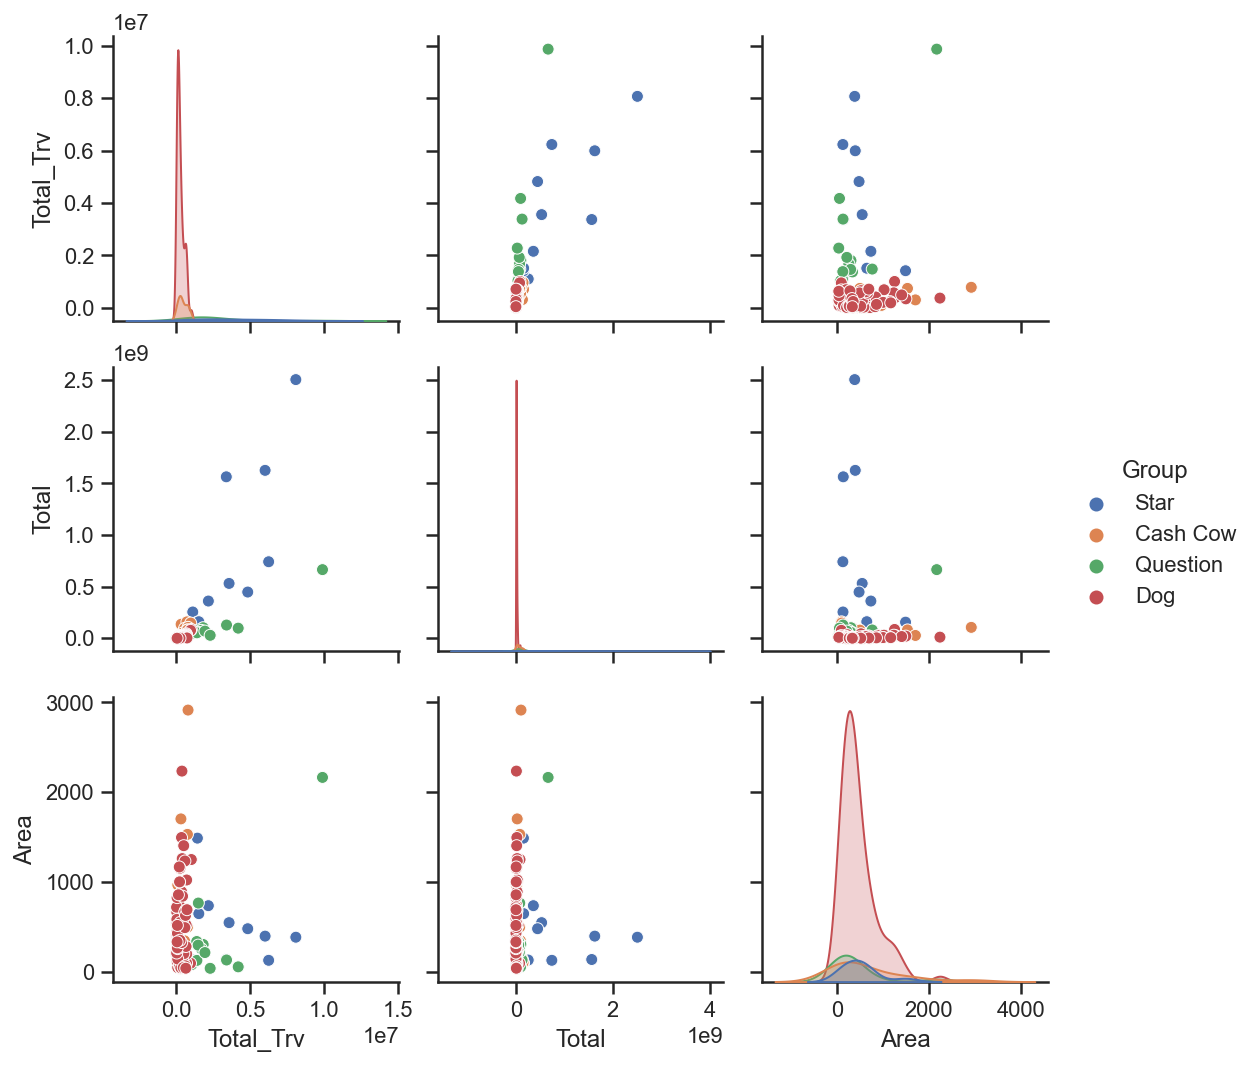

In [68]:
# Plot the pairplot of data.
sns.pairplot(df,vars=['Total_Trv','Total','Area'],hue='Group')

In [69]:
# Apply K-Mean clustering algorithym k =4 to classify the type of natural park.

In [70]:
# Import sklearn library.
from sklearn.cluster import KMeans

In [71]:
# Define X data for K-Mean model.
# X = df[['Total_Trv','Total','Area']]
X = df[['R-score','T-score']]
X

,R-score,T-score
0,5.317317,3.334227
1,3.557704,7.984781
2,3.109395,5.929677
3,2.638856,1.091303
4,1.912413,2.134784
5,1.709775,3.519760
6,1.362065,6.166944
7,1.258382,1.401184
8,1.211973,1.496281
9,1.063499,4.768404


In [72]:
model = KMeans(n_clusters=4)

In [73]:
model

KMeans(n_clusters=4)

In [74]:
# Run model.
model.fit(X)

KMeans(n_clusters=4)

In [75]:
# Check centroid data.
model.cluster_centers_

array([[0.57025741, 0.37742022],
       [2.20010729, 7.46224673],
       [0.92097327, 3.3600174 ],
       [3.67667143, 1.09106444]])

In [76]:
model.labels_
# 0 => Cash Cow Group(HRLT) : High Revenue But Low Traveler
# 1 => Dog Group(LRLT)      : Low Revenue Low Traveler
# 2 => Star Group(HRHT)     : High Revenue High Traveler
# 3 => Question Group(LRHT) : Low Revenue But High Traveler 

array([3, 1, 1, 3, 2, 2, 1, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

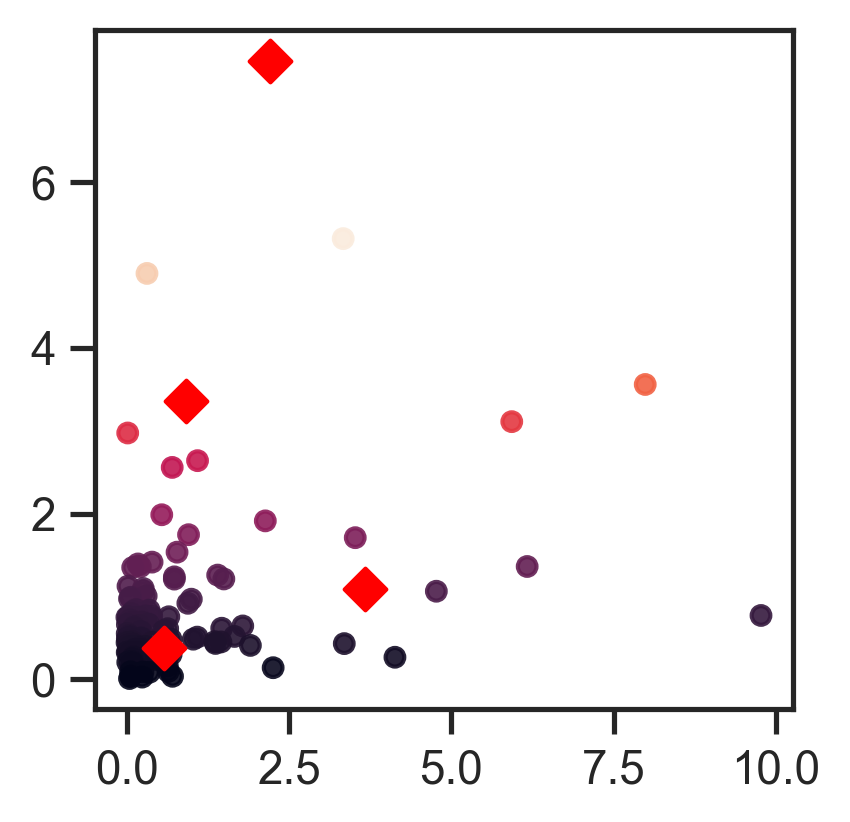

In [79]:
# Plot data with centroid. 
# x = T-score (Traveler score) 
# y = R-score (Revenue score)
x = X['T-score']
y = X['R-score']
plt.figure(figsize=(3,3),dpi=150)
plt.scatter(x, y, s=20, c=y, alpha=.9);
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            color='red', marker='D', s=50)

In [80]:
# Recheck the group name. 
df['Group'].values # Series to ndarray

array(['Star', 'Star', 'Star', 'Star', 'Star', 'Star', 'Star', 'Star',
       'Star', 'Star', 'Cash Cow', 'Cash Cow', 'Cash Cow', 'Cash Cow',
       'Cash Cow', 'Cash Cow', 'Cash Cow', 'Cash Cow', 'Cash Cow',
       'Cash Cow', 'Cash Cow', 'Cash Cow', 'Cash Cow', 'Cash Cow',
       'Cash Cow', 'Cash Cow', 'Question', 'Question', 'Question',
       'Question', 'Question', 'Question', 'Question', 'Question',
       'Question', 'Question', 'Question', 'Question', 'Question', 'Dog',
       'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog', 'Dog',
       'Dog', 'Dog', 'Dog'

In [81]:
# Validate the model accuracy by using train data.
pd.crosstab(df['Group'], model.labels_)
# 0 => Cash Cow Group(HRLT) : High Revenue But Low Traveler
# 1 => Dog Group(LRLT)      : Low Revenue Low Traveler
# 2 => Star Group(HRHT)     : High Revenue High Traveler
# 3 => Question Group(LRHT) : Low Revenue But High Traveler 

col_0,0,1,2,3
Group,,,,
Cash Cow,13,0,0,3
Dog,94,0,0,0
Question,9,1,3,0
Star,2,3,3,2


In [82]:
# Input the test data for checking the predicted result. 
# x = T-score (Traveler score) 
# y = R-score (Revenue score)

# Output
# 0 => Cash Cow Group(HRLT) : High Revenue But Low Traveler
# 1 => Dog Group(LRLT)      : Low Revenue Low Traveler
# 2 => Star Group(HRHT)     : High Revenue High Traveler
# 3 => Question Group(LRHT) : Low Revenue But High Traveler 
model.predict([[8,1],[0.3,0.2],[6,6],[1,5] ])

array([3, 0, 1, 2])

In [83]:
# จะเห็นว่าถ้าใช้กลุ่มแค่4กลุ่ม จะแบ่งกลุ่มได้ไม่ชัดเจน เราจึงใช้ Elbow Method มาคำนวนหาค่า centroid ของอัลกอริทึม k-means เพื่อให้ได้ผลลัพธ์ที่ดีกว่าเดิม

[[1, 367.7025546227376], [2, 141.64875755792937], [3, 104.60658356135588], [4, 73.20963293498926], [5, 54.96471268413197], [6, 42.86996372441706], [7, 33.061727928586464], [8, 27.45160774157055], [9, 22.98626939306839], [10, 19.321246028943776], [11, 16.545966356417473], [12, 13.488472206526705], [13, 11.940765167552353], [14, 10.520571374730778], [15, 8.77409124219354], [16, 8.119734061465836]]


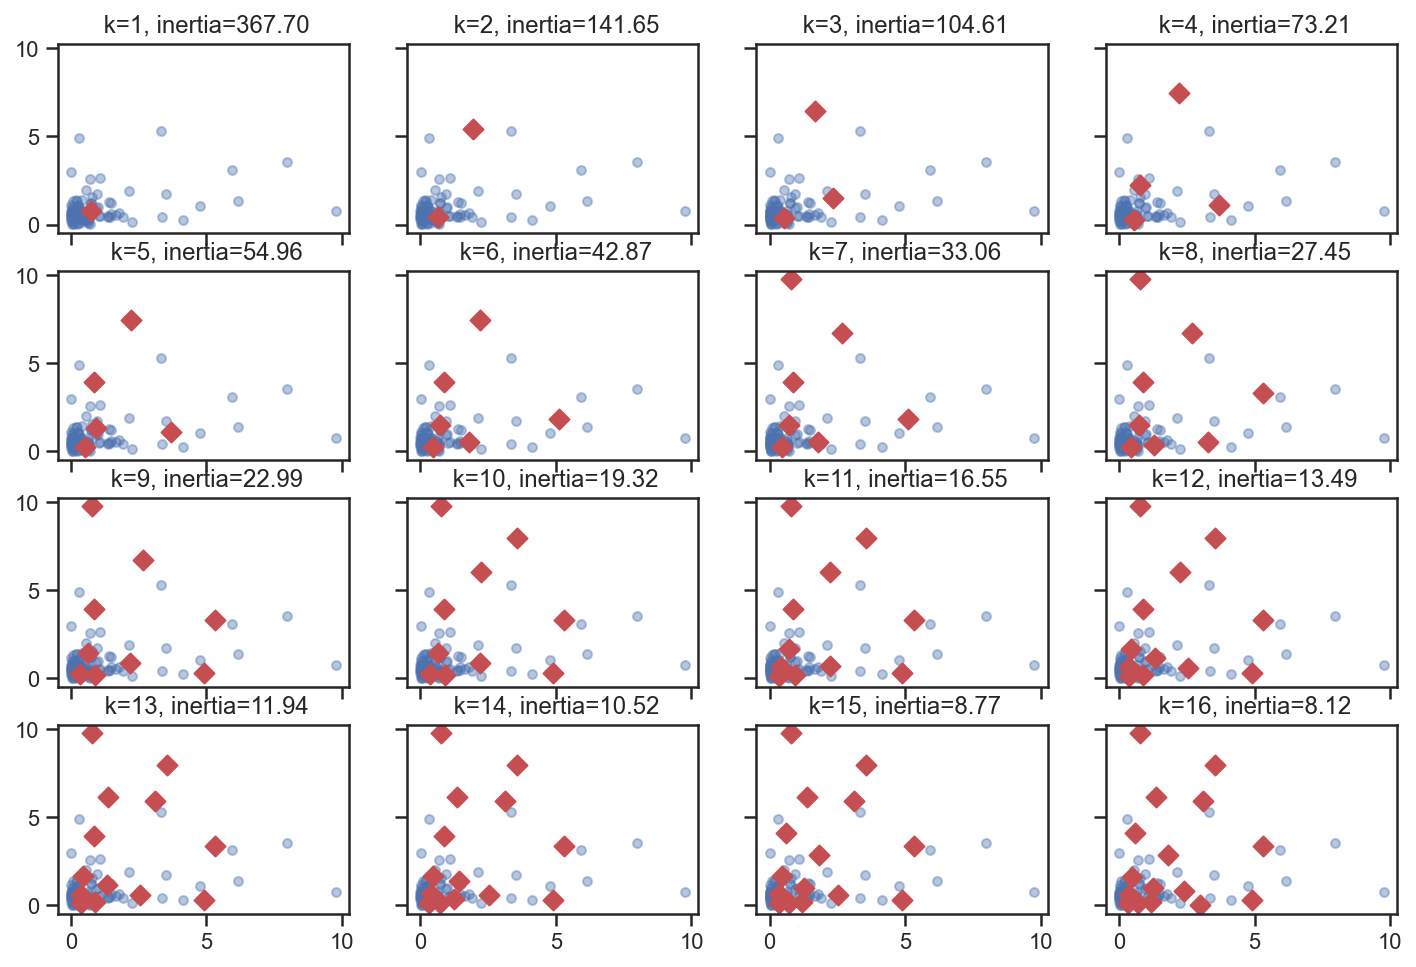

In [84]:
# Try to visualize data with differnt k-value and Check the inertia value. 
fig, ax = plt.subplots(4, 4, figsize=(12,8), sharex=True, sharey=True)
k=1
ssd=[] # (model.inertia_) Sum of squared distances of samples to their closet cluster center
for r in range(ax.shape[0]):
    for c in range(ax.shape[1]):
#        ax[r, c].scatter(x, y, s=20, c=y, alpha=.4)
        ax[r, c].scatter(x, y, s=20, alpha=.4) 
        m=KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k, m.inertia_])
        ax[r, c].scatter(m.cluster_centers_[:, 0], m.cluster_centers_[:, 1], color='r', marker='D', s=50)
        ax[r, c].set_title(f' k={k}, inertia={m.inertia_:,.2f}')
        k +=1
print(ssd)

In [85]:
# Print the result of inertia.
xy=np.array(ssd)
print(xy)

[[  1.         367.70255462]
 [  2.         141.64875756]
 [  3.         104.60658356]
 [  4.          73.20963293]
 [  5.          54.96471268]
 [  6.          42.86996372]
 [  7.          33.06172793]
 [  8.          27.45160774]
 [  9.          22.98626939]
 [ 10.          19.32124603]
 [ 11.          16.54596636]
 [ 12.          13.48847221]
 [ 13.          11.94076517]
 [ 14.          10.52057137]
 [ 15.           8.77409124]
 [ 16.           8.11973406]]


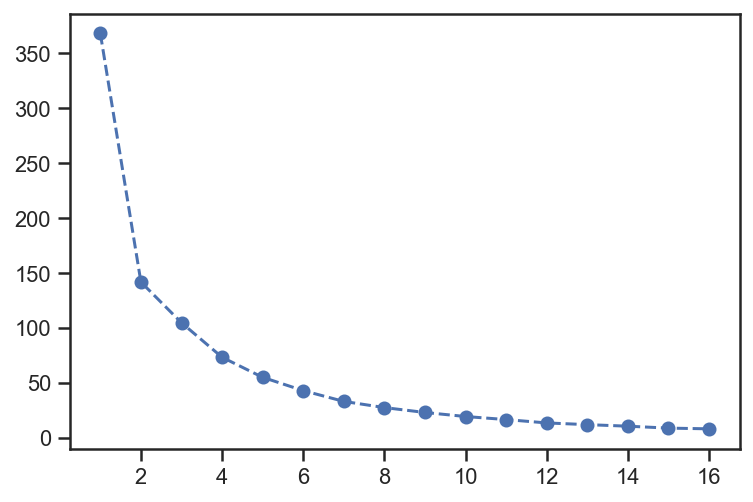

In [86]:
# Plot data to check elbow and Select the best k-value.
plt.plot(xy[:, 0],xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [87]:
# Select the star group.
df_star = df[df['Group'] == 'Star']
df_star

,Name,Total_Trv,Total,Area,Rv_Trv,R-score,T-score,A-score,Group,Cluster
0,หมู่เกาะสิมิลัน,3370963.0,1.564310e+09,140.000000,464.054404,5.317317,3.334227,0.220100,Star,1
1,หาดนพรัตน์ธารา-หมู่เกาะพีพี,8072756.0,2.506502e+09,387.899472,310.488997,3.557704,7.984781,0.609833,Star,1
2,อ่าวพังงา,5995009.0,1.626830e+09,400.000000,271.363980,3.109395,5.929677,0.628856,Star,1
3,หมู่เกาะลันตา,1103327.0,2.540951e+08,134.000000,230.299014,2.638856,1.091303,0.210667,Star,1
4,เขาสก,2158305.0,3.602225e+08,738.740000,166.900646,1.912413,2.134784,1.161403,Star,1
5,เอราวัณ,3558540.0,5.309911e+08,549.976000,149.215999,1.709775,3.519760,0.864640,Star,1
6,เขาแหลมหญ้า-หมู่เกาะเสม็ด,6234890.0,7.411449e+08,131.000000,118.870573,1.362065,6.166944,0.205950,Star,1
7,ตะรุเตา,1416622.0,1.555762e+08,1490.000000,109.821922,1.258382,1.401184,2.342490,Star,1
8,หมู่เกาะช้าง,1512767.0,1.600079e+08,650.000000,105.771685,1.211973,1.496281,1.021892,Star,1
9,ดอยอินทนนท์,4820941.0,4.474507e+08,482.400000,92.813986,1.063499,4.768404,0.758401,Star,1


In [88]:
df_star.iloc[(0,4)].round(2)

464.05

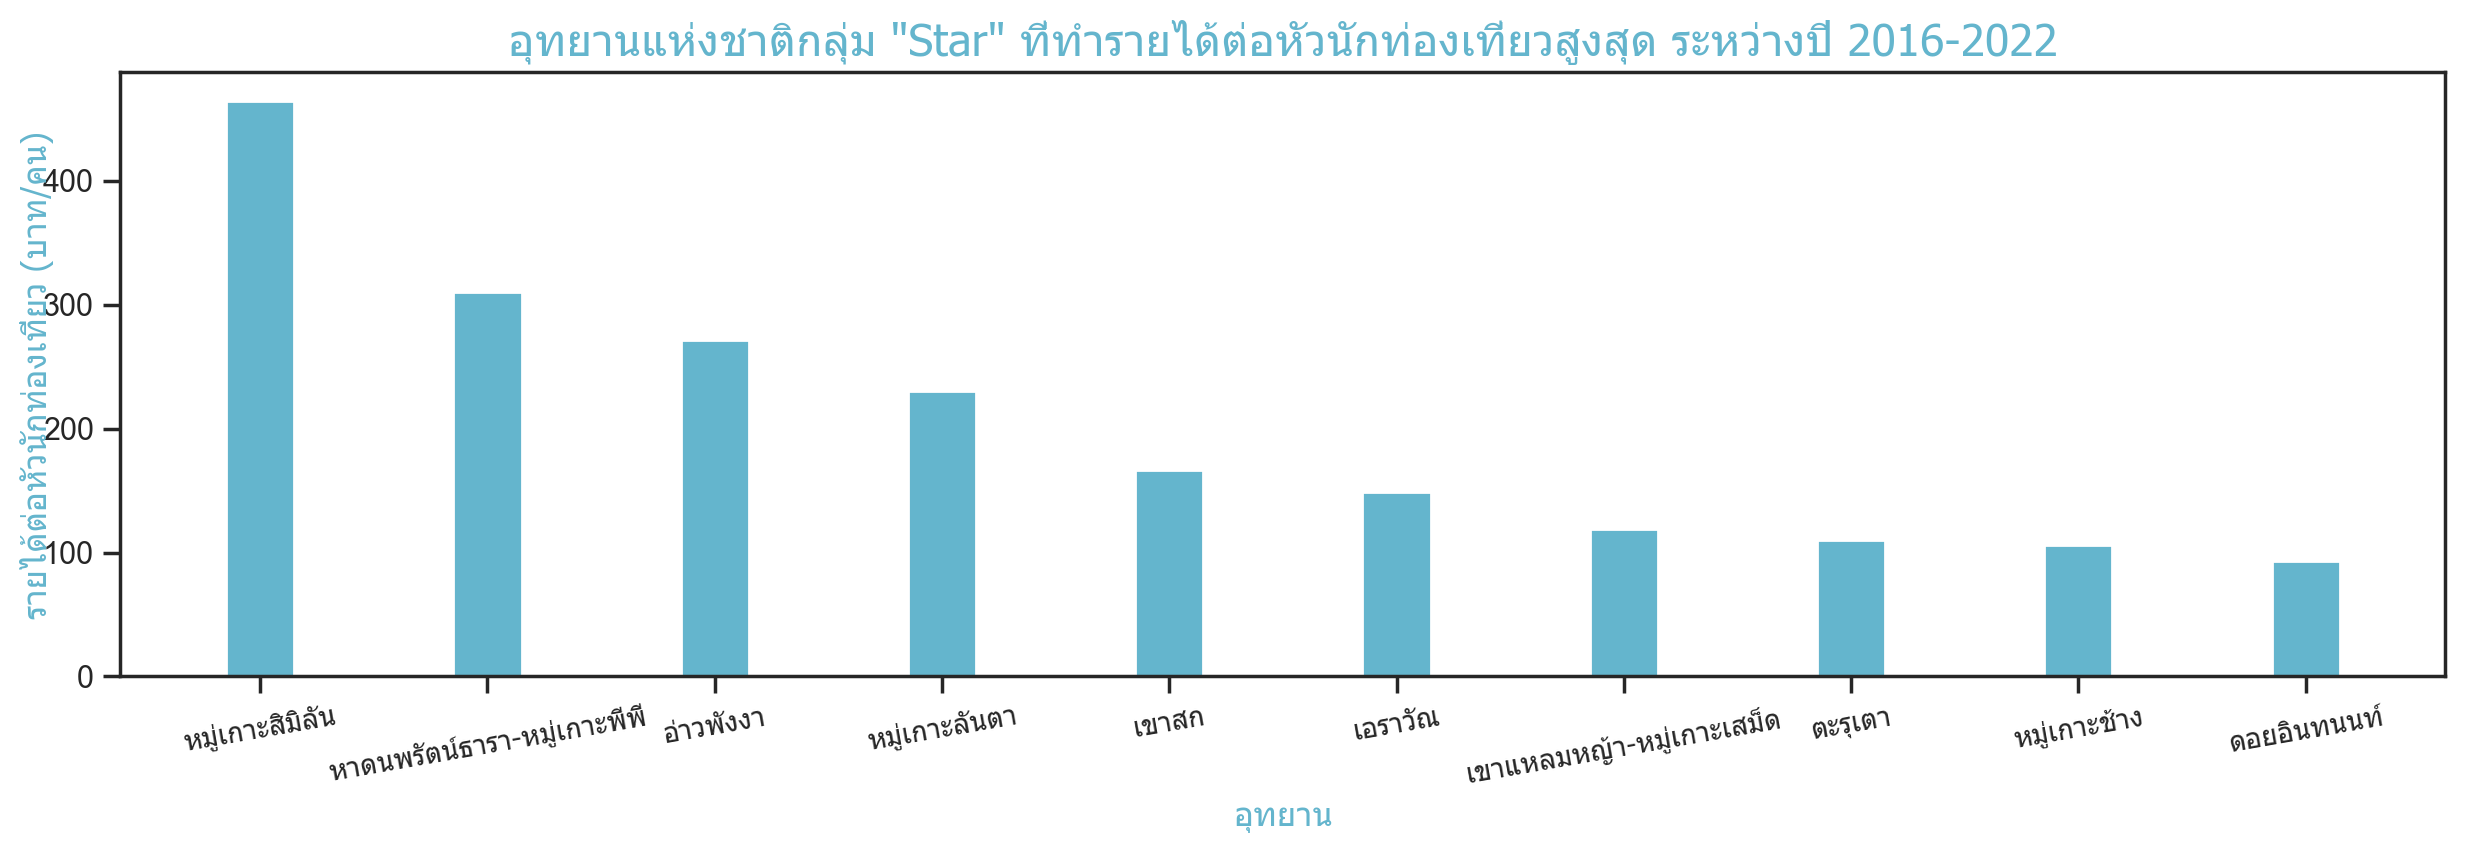

In [89]:
# Plot the star group of natural park in bar chart format.
c = np.arange(1,11)
cdata = []
ddata = []
for i in range(0,10):
    cdata.append(df_star.iloc[(i,0)])
    ddata.append(df_star.iloc[(i,4)].round(2))

plt.figure(figsize=[15,4],dpi=100)
ax = plt.axes(xticks=c) # กำหนดให้ขีดวางตรงทุกค่าตำแน่งที่ป้อนเข้าไป (คือ 1 ถึง 10)
ax.set_xticklabels(cdata,rotation=10,fontname='Tahoma',fontsize='10') # ใส่ชื่ออุทยานลงไปแทนตัวเลข 1 ถึง 10
ax.set_title(u'อุทยานแห่งชาติกลุ่ม "Star" ที่ทำรายได้ต่อหัวนักท่องเที่ยวสูงสุด ระหว่างปี 2016-2022',fontname='Tahoma',fontsize='16',color='c')
ax.set_xlabel(u'อุทยาน',fontname='Tahoma',fontsize='12',color='c')
ax.set_ylabel(u'รายได้ต่อหัวนักท่องเที่ยว (บาท/คน)',labelpad=-4,fontname='Tahoma',fontsize='12',color='c')

plt.savefig('Star_Group', dpi=1000, transparent=False)
plt.bar(c,ddata,color='c',width=0.3)
plt.show()

<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:##228B22">
Answer for Part III. จากการวิเคราะห์ผลลัพธ์ทั้งหมดของการหาอุทยานแห่งชาติที่ทำรายได้ต่อหัวนักท่องเที่ยวมากที่สุดและจำนวนนักท่องเที่ยวมากที่สุดจะพบว่าอยู่ในกลุ่ม "Star" ได้แก่</h1> 
<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#228B22">
1.หมู่เกาะสิมิลัน
2.หมู่เกาะพีพี
3.อ่าวพังงา
4.หมู่เกาะลันตา
5.เขาสก
6.เอราวัณ
7.เกาะเสม็ด
8.ตะรุเตา
9.หมู่เกาะช้าง
10.ดอยอินทนนท์
</h1>
<h1 style="font-size:1.5em; font-family: verdana, Geneva, sans-serif; color:#4682B4">
ดังนั้นถ้าจะจัดสรรงบประมาณเพื่อส่งเสริมการท่องเที่ยวอุทยานแห่งชาติ ที่รัฐบาลควรส่งเสริมตั้งแต่ปี2023เป็นต้นไป เพราะเป็นอุทยานที่มีศักยภาพมากเป็นพิเศษ ก็ควรเน้นโฟกัสการโปรโมตการท่องเที่ยว10อุทยานแห่งชาติข้างต้นเพื่อเป็นการหารายได้เข้าประเทศหลังจากวิกฤติการณ์โควิด19ที่เหมาะสมที่สุด </h1>